In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D

import xspec as x
#import os

#%matplotlib notebook

#import sys
#sys.stdout = open('/dev/stdout', 'w')
#sys.stderr = open('/dev/stderr', 'w')

# 1. LINES ONLY

В этом блоке представлен алгоритм для вычисления $T_{spec}$ по спектрам (с преобладанием линий) двухкомпонентной плазмы разными способами и отображения его как на Рис.3 из публикации Вихлинина.

## 1.1 $T_{spec}$ from E(T)

Defining functions to draw $E \ (T)$:

In [2]:
def f(temperature, eMean, tList): 
    
    # <E> = f(T)
    #returns energy
    
    return eMean[np.argmin(np.abs(tList - temperature))]

    
def f_inv(energy, eMean, tList): 
    
    # T = f^(-1) (<E>)
    #returns temperature
    
    return tList[np.argmin(np.abs(eMean - energy))]
    
    
def get_data(dataName, show_table=False):
    
    # extracts data obtained from stats.sh
    # dataName is stats_NN.dat

    headers = [ 'Flux', 'Abund', 'T', 'z', 'n_H', 'Chnls', '$E_{min}$', '$E_{max}$', '$E_{sum}$', 'cs', 'ecs' ] 
    table = pd.read_csv(dataName, sep = ' ', names = headers)
    
    # adding column with E_mean
    
    table['$E_{mean}$'] = table['ecs']/table['cs']
    
    if show_table:
        display(table)
        
    # returns table as numpy array (?)
    
    return table.to_numpy().astype(float)
    

def plot_E_T(dataName, spectra_type, telescope):
    
    # plotting <E>(T) as in Fig.2 for given dataName
    # you should add spectra type and telescope name by yourself
    
    # possible values:
    # spectra_type = 'Line' or sectra_type = 'Continuum'
    # telescope = 'Chandra' or telescope = 'SRG/eROSITA'

    #print(dataName)
    #headers = [ 'Flux', 'Abund', 'T', 'z', 'n_H', 'Chnls', '$E_{min}$', '$E_{max}$', '$E_{sum}$', 'cs', 'ecs' ] 
    #table = pd.read_csv(dataName, sep = ' ', names = headers)
    #adding column with E_mean
    #table['$E_{mean}$'] = table['ecs']/table['cs'] 
    #data = table.to_numpy().astype(float)
    
    data = get_data(dataName, show_table=False)
    
    e_mean = data[:,11]
    temp = data[:,2]
    
    # taking first ever values of corresponding characteristics 
    
    #abundance = table['Abund'].to_numpy().astype(float)[0]
    #absorption = table['n_H'].to_numpy().astype(float)[0]
    #redshift = table['z'].to_numpy().astype(float)[0]
    
    abundance = data[0, 1]
    absorption = data[0, 4]
    redshift = data[0, 3]
    
    plt.plot(temp, e_mean, linewidth = 3, label = spectra_type + ', ' + telescope)
    
    plt.ylim(0, 3)
    plt.xlabel('Temperature (keV)', fontsize = 15)
    plt.ylabel('Average energy (keV)', fontsize = 15)
    plt.title(spectra_type + '-dominated spectra (' + telescope + 
              ') \n $n_H =' + str(absorption) + '\cdot 10^{22} \ cm^{-2}$; z = ' + 
              str(redshift), fontsize = 15) # +'; Z = '+str(abundance)+' Solar units')
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xscale('log')
    #plt.yscale('log')
    #plt.grid()
    plt.legend(fontsize = 15, loc=2)

    #return data[:,11], data[:,2]
    #return e_mean, temp
    
def add_T(Tmin, Tmax, dataName):
    
    # adding vertical lines for given temperatures
    # and horizontal lines for corresponding energies
    
    data = get_data(dataName, show_table=False)
    
    eMean = data[:,11]
    tList = data[:,2]
    
    plt.axvline(Tmin, linewidth=3, linestyle="--", color='red')
    plt.axvline(Tmax, linewidth=3, linestyle="--", color='green')
    
    #E_min = e_mean[np.argmin(np.abs(temp - Tmin))]
    #E_max = e_mean[np.argmin(np.abs(temp - Tmax))]
    E_min = f(Tmin, eMean, tList)
    E_max = f(Tmax, eMean, tList)
    
    print('E_max =', round(E_max,2), 'keV')
    print('E_min =', round(E_min,2), 'keV')
    
    plt.axhline(E_min, linewidth=3, linestyle="--", color='red', label='$E_{min}, T_{min}$')
    plt.axhline(E_max, linewidth=3, linestyle="--", color='green', label='$E_{max}, T_{max}$')
    
    plt.legend(fontsize=15, loc = 4)

Построим графики зависимости средних энергий от температуры для различных спектров и телескопов. Эти зависимости получены в результате выполнения скрипта `stats.sh`.

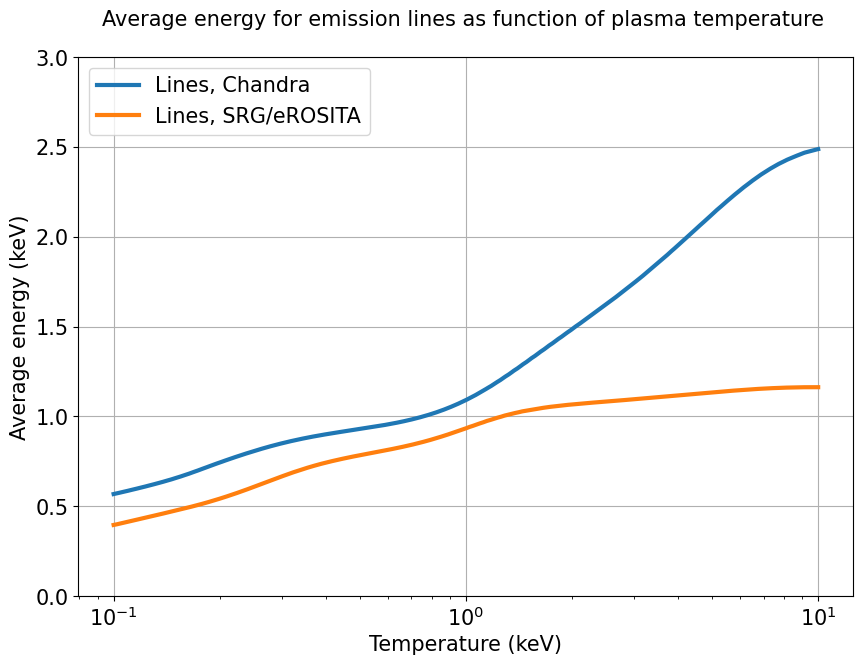

In [3]:
plt.figure(figsize=(10,7))

data_name1 = "data/stats_03.dat"   #'Lines, CH'
data_name2 = "data/stats_11.dat"   #'Cont, CH'
data_name3 = "data/stats_10.dat"   #'Lines, ER'
data_name4 = "data/stats_13.dat"   #'Cont, ER'
data_name5 = "data/stats_07.dat"   #'Lines, ER'
data_name6 = "data/stats_12.dat"   #'Lines, ER'

plot_E_T(data_name1, 'Lines', 'Chandra')
#plot_E_T(data_name2, 'Continuum', 'Chandra')
plot_E_T(data_name3, 'Lines', 'SRG/eROSITA')
#plot_E_T(data_name4, 'Continuum', 'SRG/eROSITA')
#plot_E_T(data_name6, 'Line2', 'er')


#for i in ['02', '03', '05', '08', '14', '15', '04', '16']:
#        dn = "data/stats_"+str(i)+".dat"
#        plot_E_T(dn, str(i), 'Chandra')

        
#plt.xscale('linear')

#add_T(1.0, 3.0, data_name1)

# comment if there is only one E(T)
# this move deletes unique titles
plt.title('Average energy for emission lines as function of plasma temperature \n', fontsize=15)
plt.grid()
#plt.savefig('letter26.10/Fig2.png')
plt.show()

Алгоритм вычисления $T_{spec}$ по графикам $E \ (T)$ согласно формулам (1-3):

In [4]:
def get_Tspec_lines(fmin, Tmin, Tmax, Data):
    
    # derive T_spec from given values 
    # of T_min, T_max, f_min and for given <E>(T)

    E_1 = f(Tmin, Data[:,11], Data[:,2])
    E_2 = f(Tmax, Data[:,11], Data[:,2])

    S_j_1 = Data[np.argmin(np.abs(Data[:,2] - Tmin)), 9]
    S_j_2 = Data[np.argmin(np.abs(Data[:,2] - Tmax)), 9]
    
    #print(Data[np.argmin(np.abs(tList - Tmin)),9], Data[np.argmin(np.abs(tList - Tmax)),9])
    #print()

    num =    fmin*S_j_1*E_1 + (1-fmin)*S_j_2*E_2
    denom =  fmin*S_j_1     + (1-fmin)*S_j_2
    
    #Etot = num/denom
    #Tspec = f_inv(Etot, Data[:,11], Data[:,2])
    #plt.scatter(fmin, Tspec, color="blue")

    return f_inv(num/denom, Data[:,11], Data[:,2])


def plot_Tspec_fmin(Tmin, Tmax, N_fmins, Data, naive=False, lstyle = '-', cline = 'blue'):

    # draw plot like Fig.3

    f_min = np.linspace(0, 1, N_fmins+1)
    
    #naive weighting
    if naive:
        plt.plot(f_min, f_min*T_min+(1-f_min)*T_max, linestyle = '--', linewidth=2, color='black')

    T_spec = f_min*0

    for i in range(0, len(f_min)):

        T_spec[i] = get_Tspec_lines(f_min[i], T_min, T_max, Data)

    #print('*************')

    plt.plot(f_min, T_spec, linewidth=2, linestyle = lstyle, color = cline)
    #, label='eq. [1-3]')#'from '+str(T_max)+' to '+str(T_min))

def plot_Tspec_fmin_details():  
    
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xlabel('$f_{min}$', fontsize = 15)
    plt.ylabel('$T_{spec}$ (keV)', fontsize = 15)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    line_n = Line2D([], [], label='Naive weighting', color='black', linestyle='--', linewidth=2)
    line_e = Line2D([], [], label='$T_{spec}$ from eq. [1-3]', color='blue', linestyle='-', linewidth=2)
    dots_f = Line2D([], [], label='Single-T fit', color='black', marker='.', linestyle='None', markersize=12)
    handles.extend([line_n, line_e, dots_f])
    plt.legend(handles=handles, fontsize=15)

## 1.2 $T_{spec}$ from direct fit

In [584]:
def draw_model(nrm, linesandcont):
    
    x.Plot("model")
    x.Plot.add = True
    #x.Plot.setID()
    xVals = x.Plot.x()
    modVals = x.Plot.model()
    yAdd1 = x.Plot.addComp(1)
    yAdd2 = x.Plot.addComp(2)
    plt.plot(xVals, modVals, linewidth = 3, label='Initial model', color='black')
    if linesandcont:
        yAdd3 = x.Plot.addComp(3)
        yAdd4 = x.Plot.addComp(4)
        yAdd12 = [a+b for a,b in zip(yAdd1, yAdd2)]
        yAdd34 = [c+d for c,d in zip(yAdd3, yAdd4)]
    else:
        yAdd12 = yAdd1
        yAdd34 = yAdd2
    plt.plot(xVals, yAdd12, linewidth = 2, linestyle = ":", 
             label=f'Low T', color='red')
    plt.plot(xVals, yAdd34, linewidth = 2, linestyle = "--", 
             label=f'High T', color='green')
    #plt.plot(xVals, yAdd12, label='sum 1 2')
    #plt.plot(xVals, yAdd34, label='sum 3 4')
    #plt.plot(xVals, yAdd3, label='3')
    #plt.plot(xVals, yAdd4, label='4')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0.1, 14)
    plt.ylim(bottom=10**(-7), top=10**(1.5)*nrm)
    plt.legend(fontsize = 15, loc=1)
    add_plt_fancy()
    #plt.show()
    
def draw_best_model(nrm, linesandcont):
    
    x.Plot("model")
    modVals = x.Plot.model()
    xVals = x.Plot.x()
    if linesandcont:
        y1 = x.Plot.addComp(1)
        y2 = x.Plot.addComp(2)
        plt.plot(xVals, y1, label="APEC: Z=$Z_{{from \ fit}}$")
        #plt.plot(xVals, y2, label="APEC: Z=0")
        plt.plot(xVals, [-aa for aa in y2], label='APEC: Z=0')
        #plt.plot(xVals, [c+d for c,d in zip(y1, y2)], label='sum')
    plt.plot(xVals, modVals, label=f"Best-fit", color='blue', alpha=0.3)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0.1, 14)
    plt.ylim(bottom=10**(-6), top=10**(1.5)*nrm)
    add_plt_fancy()
    #plt.title(f"Best-fit model (reduced $\\chi^2=$ {x.Fit.statistic/x.Fit.dof:.3f})", fontsize = 15)
    #plt.show()
    
def draw_goodness():
    
    x.Plot("goodness")
    xValsG = x.Plot.x()
    yValsG = x.Plot.y()
    #print(xValsG, yValsG)
    #plt.hist(yValsG, bins=xValsG)
    plt.bar(xValsG, height=yValsG, width = (np.min(xValsG)-np.max(xValsG))/len(xValsG))
    #plt.plot(xValsG, yValsG, label="goodness")
    plt.xlabel(x.Plot.labels()[0], fontsize = 15)
    plt.ylabel(x.Plot.labels()[1], fontsize = 15)
    plt.title(x.Plot.labels()[2], fontsize = 15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.axvline(x.Fit.statistic, linestyle = "--", color='red', linewidth = 3)
    
def draw_data_and_best_model(nrm, linesandcont):
    
    x.Plot("data")
    x.Plot.xAxis = "keV"
    x.Plot.add = True
    xVals = x.Plot.x()
    yVals = x.Plot.y()
    if linesandcont:
        y1 = x.Plot.addComp(1)
        y2 = x.Plot.addComp(2)
    modVals = x.Plot.model()
    #plt.plot(xVals, modVals, linewidth = 5, color = 'green')
    plt.yscale('log')
    plt.plot(xVals, yVals, label='Data', color='black') 
    xErrs = x.Plot.xErr()
    yErrs = x.Plot.yErr()
    plt.errorbar(xVals, yVals, yErrs, xErrs, 
                 fmt = "none", ecolor = "black", label="Data with errors")
    if linesandcont:
        plt.plot(xVals, y1, label="APEC: Z=$Z_{{from \ fit}}$")
        plt.plot(xVals, [-aa for aa in y2], label="APEC: Z=0")
        summa = [c+d for c,d in zip(y1, y2)]
        plt.plot(xVals, summa, label='Best-fit', color='red') #modVals = summa
    else:
        plt.plot(xVals, modVals, label='Best-fit', color='red')
    add_plt_fancy()
    plt.xlabel("")
    plt.ylim(0.0001, 10**4*nrm)
    plt.title(f"Data and best-fit model (reduced $\\chi^2=$ {x.Fit.statistic/x.Fit.dof:.3f})", fontsize = 15)
    
    plt.subplot(6,2,6)
    x.Plot("resid")
    #plt.subplot(2,2,4)
    xValsR = x.Plot.x()
    yValsR = x.Plot.y()
    xErrsR = x.Plot.xErr()
    yErrsR = x.Plot.yErr()
    plt.errorbar(xValsR, yValsR, yErrsR, xErrsR, 
                 fmt = "none", ecolor = "black", label="errors")
    if not linesandcont:
        summa = modVals
    plt.scatter(xValsR, [a-b for a,b in zip(yVals, summa)], s=3, 
                color='blue', label='data minus \nbest fit')
    add_plt_fancy()
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks([])

    plt.subplot(6,2,8)
    x.Plot("chi")
    #plt.subplot(2,2,4)
    xValsC = x.Plot.x()
    yValsC = x.Plot.y()
    #xErrsR = x.Plot.xErr()
    #yErrsR = x.Plot.yErr()
    plt.scatter(xValsC, yValsC, color = "black", label = "contribution to \n the fit statistic \n from each bin")
    add_plt_fancy()
    plt.title(x.Plot.labels()[1], fontsize = 14)
    plt.ylabel("")
            
def add_plt_fancy():
    
    plt.xlabel(x.Plot.labels()[0], fontsize = 14)
    plt.ylabel(x.Plot.labels()[1], fontsize = 14)
    plt.title(x.Plot.labels()[2], fontsize = 14)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.xscale('log')
    plt.xticks([0.1, 1., 10.], [0.1, 1, 10])
    plt.legend(fontsize=15, loc=0)
    
#def add_background():
        #x.Plot("data")
        #bkg = x.Plot.backgroundVals()
        #plt.plot(xVals, yVals)
        
def print_parnames(MODEL):
    
    ncomp = len(MODEL.componentNames)
    for icomp in MODEL.componentNames:
        print (icomp, eval(f'MODEL.{icomp}.parameterNames'))

def perform_fakeit(tname, expos):

    if tname == 'Chandra':
        RMF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.rmf' 
        ARF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.arf' 
    elif tname == 'SRG/eROSITA':
        RMF_NAME = 'telescopes/erosita/erosita_pirmf_v20210719.rmf'
        ARF_NAME = 'telescopes/erosita/tm1_arf_open_000101v02.fits'

    fs = x.FakeitSettings(response = RMF_NAME, 
                               arf = ARF_NAME, 
                        background = '', 
                          exposure = expos, 
                        correction = '', 
                      backExposure = '', 
                          fileName = 'fakeit.pha')
    x.AllData.fakeit(nSpectra = 1, 
                     settings = fs, 
                   applyStats = True,
                   filePrefix = "",
                      noWrite = True)
    
def plot_contours_from_steppar(Nst, par_x_num, par_y_num, mmmodel, zoomin=True):

    #x.Plot.device = "/xs"
    x.Plot.device = "/null"
    x.Plot("contour")
    #x.Plot.device = "/null"
    chi2 = x.Plot.z()
    #print(x.Fit.statistic, x.Plot.contourLevels())

    #plt.subplot(1,2,1)
    
    par_x = mmmodel(par_x_num).values[0]
    par_y = mmmodel(par_y_num).values[0]

    #x11 = np.linspace(best_kT-0.005, best_kT+0.005, len(chi2))
    #y11 = np.linspace(abund_from_fit-0.01, abund_from_fit+0.01, len(chi2))
    #print(x11, y11)
    x11 = x.Fit.stepparResults(str(par_x_num))[0:Nst+1]
    y11 = x.Fit.stepparResults(str(par_y_num))[0::Nst+1]
    #print(x11, y11)
    X, Y = np.meshgrid(x11, y11)
    center = np.argwhere(chi2==np.min(chi2))[0]
    #plt.contour(X, Y, XCYC, levels=[x.Fit.statistic], colors='yellow')
    center_x = X[center[0]][center[1]]
    center_y = Y[center[0]][center[1]]

    #plt.contourf(X, Y, XCYC, 20, cmap='jet')

    contours = plt.contour(X, Y, chi2, levels=x.Plot.contourLevels(), colors='red')
    #plt.clabel(contours, inline=True, fontsize=8)
    
    exxxt = [x11[0], x11[-1], y11[0], y11[-1]]
    plt.xlim(x11[0], x11[-1])
    plt.ylim(y11[0], y11[-1])
    
    if zoomin:
        #for ii, seg in enumerate(contours.allsegs[2]):
        #    xleft, xright = np.min(seg), np.max(seg)
        #    print(np.min(seg), np.max(seg))
        #    plt.plot(seg[:,0], seg[:,1], '.-', label=ii)
        #plt.legend(fontsize=9, loc='best')

        #print(len(contours.allsegs), contours.allsegs)

        # finding borders of 3sigma level (or 2sigma) for fancier imshow
        seg = contours.allsegs[len(contours.allsegs)-1]
        x_left = np.min(seg[0][:,0])
        x_right = np.max(seg[0][:,0])
        y_left = np.min(seg[0][:,1])
        y_right = np.max(seg[0][:,1])

        scale_n = 2
        x_c = (center_x + par_x)/2
        x_l = x_c - scale_n*( x_c - np.min([par_x, center_x, x_left])) #(best_kT - x_left)
        x_r = x_c + scale_n*(-x_c + np.max([par_x, center_x, x_right])) #(x_right - best_kT)
        y_c = (center_y + par_y)/2
        y_l = y_c - scale_n*( y_c - np.min([par_y, center_y, y_left])) #(abund_from_fit - y_left)
        y_r = y_c + scale_n*(-y_c + np.max([par_y, center_y, y_right])) #(y_right - abund_from_fit)

        plt.xlim(x_l, x_r)
        plt.ylim(y_l, y_r)
        exxxt = x_l, x_r, y_l, y_r
        
    plt.imshow(chi2, extent=exxxt, aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(fraction=0.046, pad=0.04)

    plt.scatter(center_x, center_y, marker='+', c='cyan', label=f'$X_{{centered}}={center_x:.3f}, Y_{{centered}}={center_y:.3f}$')
    plt.axvline(center_x, color='cyan', alpha=0.3)
    plt.axhline(center_y, color='cyan', alpha=0.3)

    plt.axvline(par_x, color='yellow', alpha=0.3)
    plt.axhline(par_y, color='yellow', alpha=0.3)
    plt.scatter(par_x, par_y, marker='+', color='yellow', label=f'$X_{{min \ \\chi^2}}={par_x:.3f}, Y_{{min \ \\chi^2}}={par_y:.3f}$')

    #seg0 = contours.allsegs[0]
    #dx_left = np.min(seg[0][:,0]) - center_x
    #dx_right = np.max(seg[0][:,0]) - center_x
    #dy_left = np.min(seg[0][:,1]) - center_x
    #dy_right = np.max(seg[0][:,1]) - center_x
    
    plt.xlabel(x.Plot.labels()[0], fontsize = 12)
    plt.ylabel(x.Plot.labels()[1], fontsize = 12)
    #titlelabels = [float(f"{a:.3f}") for a in x.Plot.contourLevels()]
    #plt.title(x.Plot.labels()[2]+f"\n Cyan cross = {x.Fit.statistic:.3f}; yellow cross = {chi2[center[0]][center[1]]:.3f} \n levels = {*titlelabels,}", fontsize = 12)
    plt.legend()
    #plt.show()
    
    #return dx_left, dx_right, dy_left, dy_right 

    #plt.subplot(1,2,2)
    # 3d
    #ax = plt.axes(projection='3d')
    #ax.contour3D(X, Y, chi2, 100, cmap='viridis')#, rstride=1, cstride=1, edgecolor='none')
    #ax.set_xlabel(x.Plot.labels()[0])
    #ax.set_ylabel(x.Plot.labels()[1])
    #ax.set_zlabel('Chi-Squared')
    #ax.set_xlim(x_l, x_r)
    #ax.set_ylim(y_l, y_r)
    #plt.colorbar(fraction=0.046, pad=0.04)
    #ax.view_init(60, 35)
    #plt.show()

def perform_steppar(mmmodel, par_x_num, par_x_delta, par_y_num, par_y_delta, Nst):
            
    best_X = mmmodel(par_x_num).values[0]
    best_Y = mmmodel(par_y_num).values[0]
    x.Xset.parallel.steppar = 4
    N_steps = Nst
    par1_delta = par_x_delta
    par2_delta = par_y_delta
    x.Fit.steppar(f"{par_x_num} {best_X-par1_delta} {best_X+par1_delta} {N_steps} {par_y_num} {best_Y-par2_delta} {best_Y+par2_delta} {N_steps}")
    #print(x.Fit.stepparResults('2'))

## PyXspec

Defining a function that calculates single-temperature fit for two-component plasma (with line-dominated spectra) of temperatures $T_{min}$ and $T_{max}$ and relative contributions $f_{min}$ and $f_{max}$ respectively.

Note: to get rid of trace elements for pure bremsstrahlung use `xset APEC_TRACE_ABUND 0`.

In [364]:
x.Xset.chatter = 0
#x.Xset.logChatter = 25

# Create and open a log file for XSPEC output
# This returns a Python file object
logFile = x.Xset.openLog("newLogFile.txt")
# Get the Python file object for the currently opened log
#logFile = x.Xset.log
# Close XSPEC's currently opened log file.
#x.Xset.closeLog()

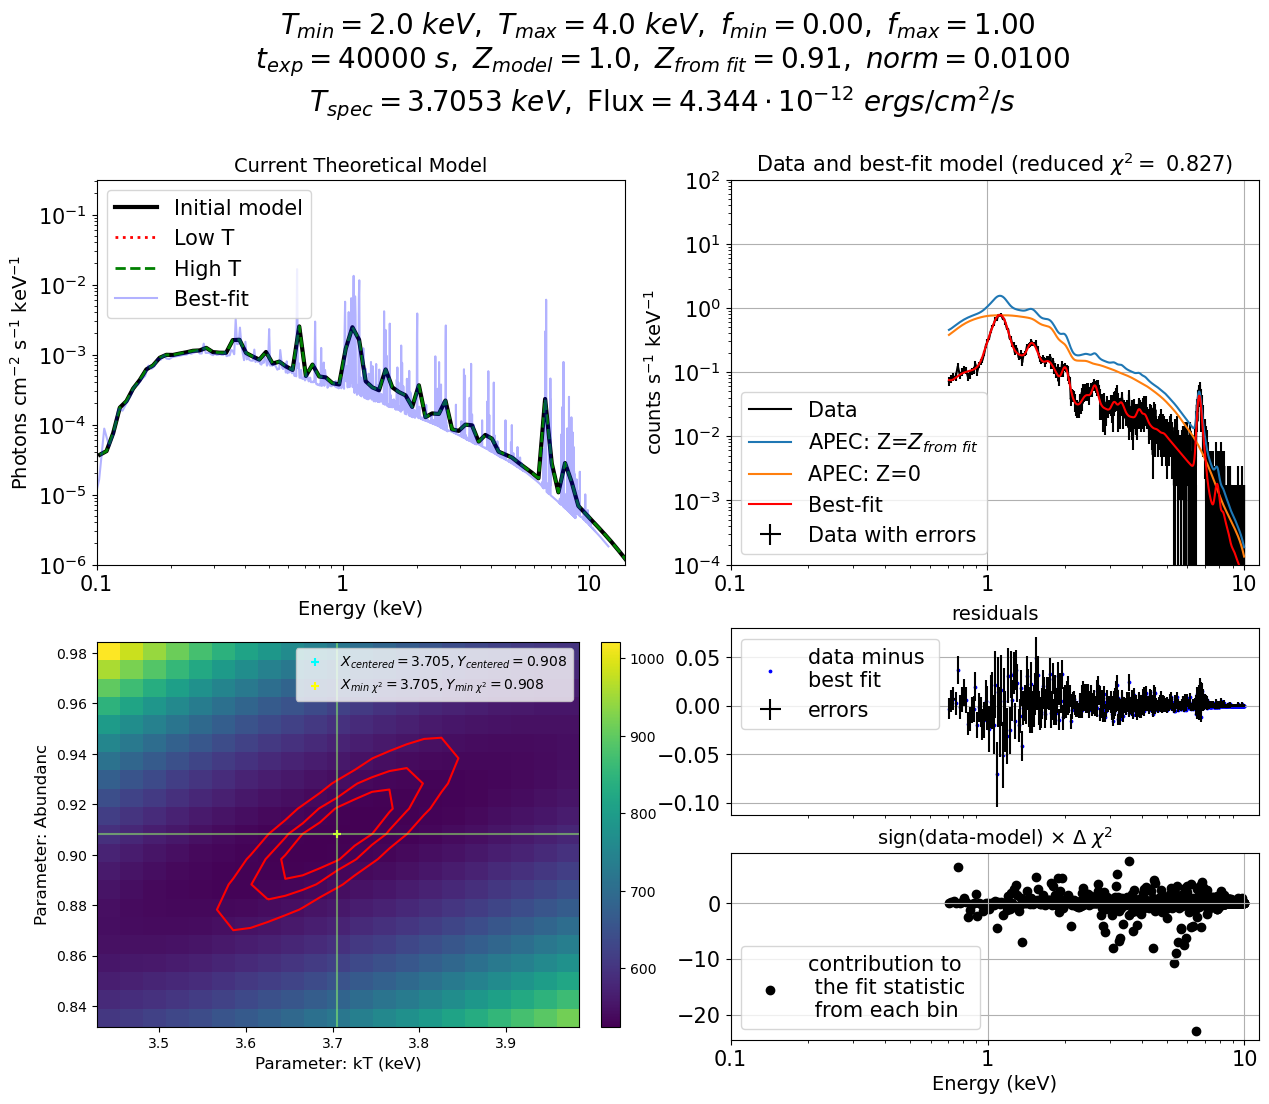

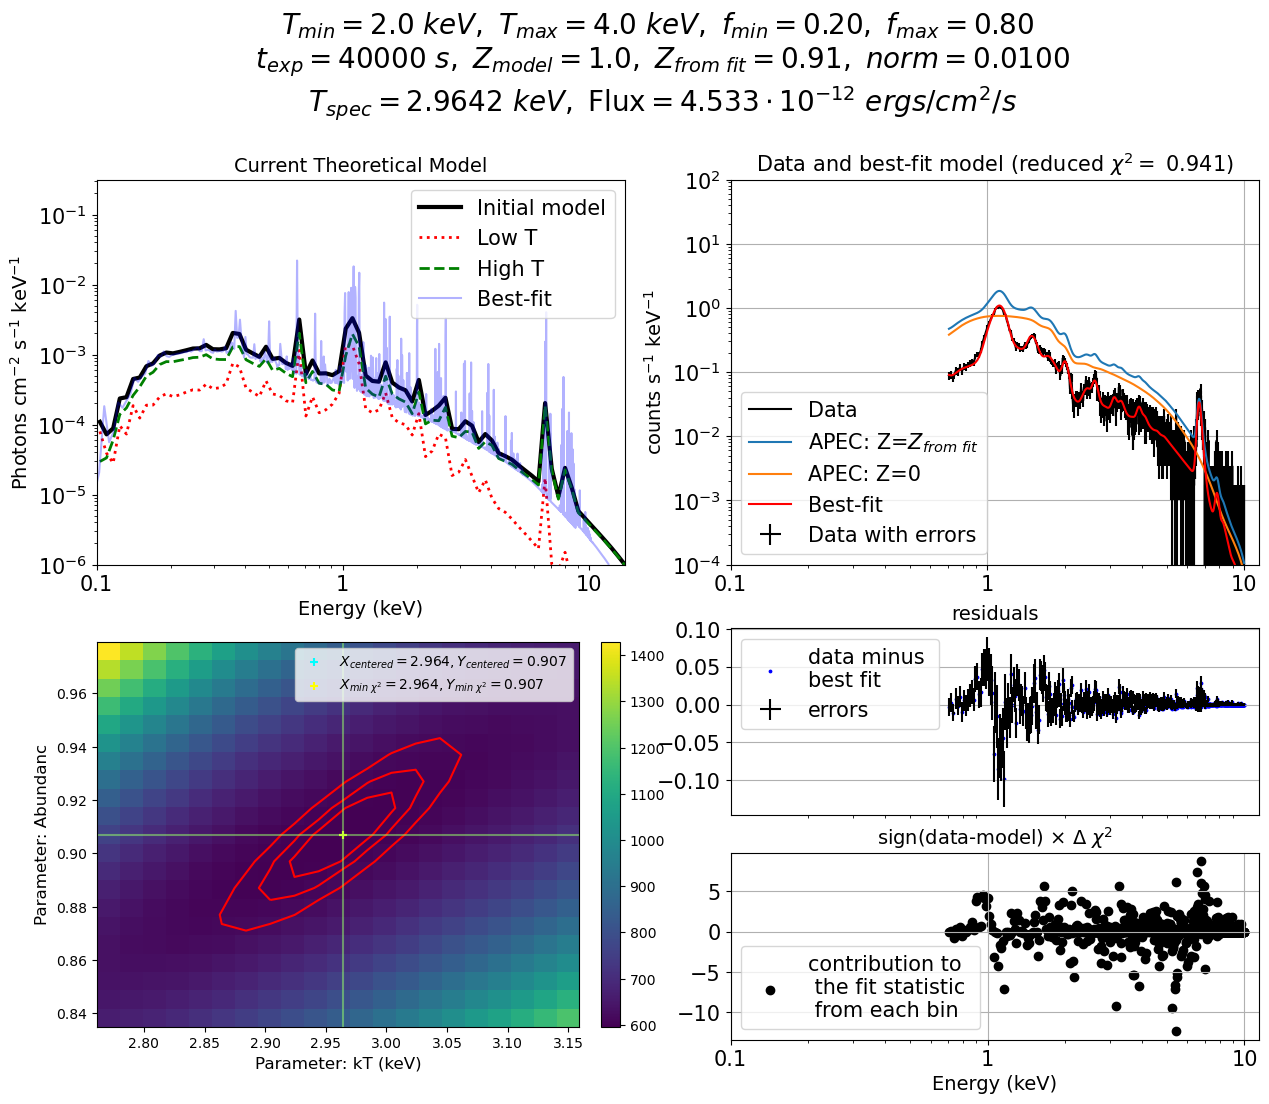

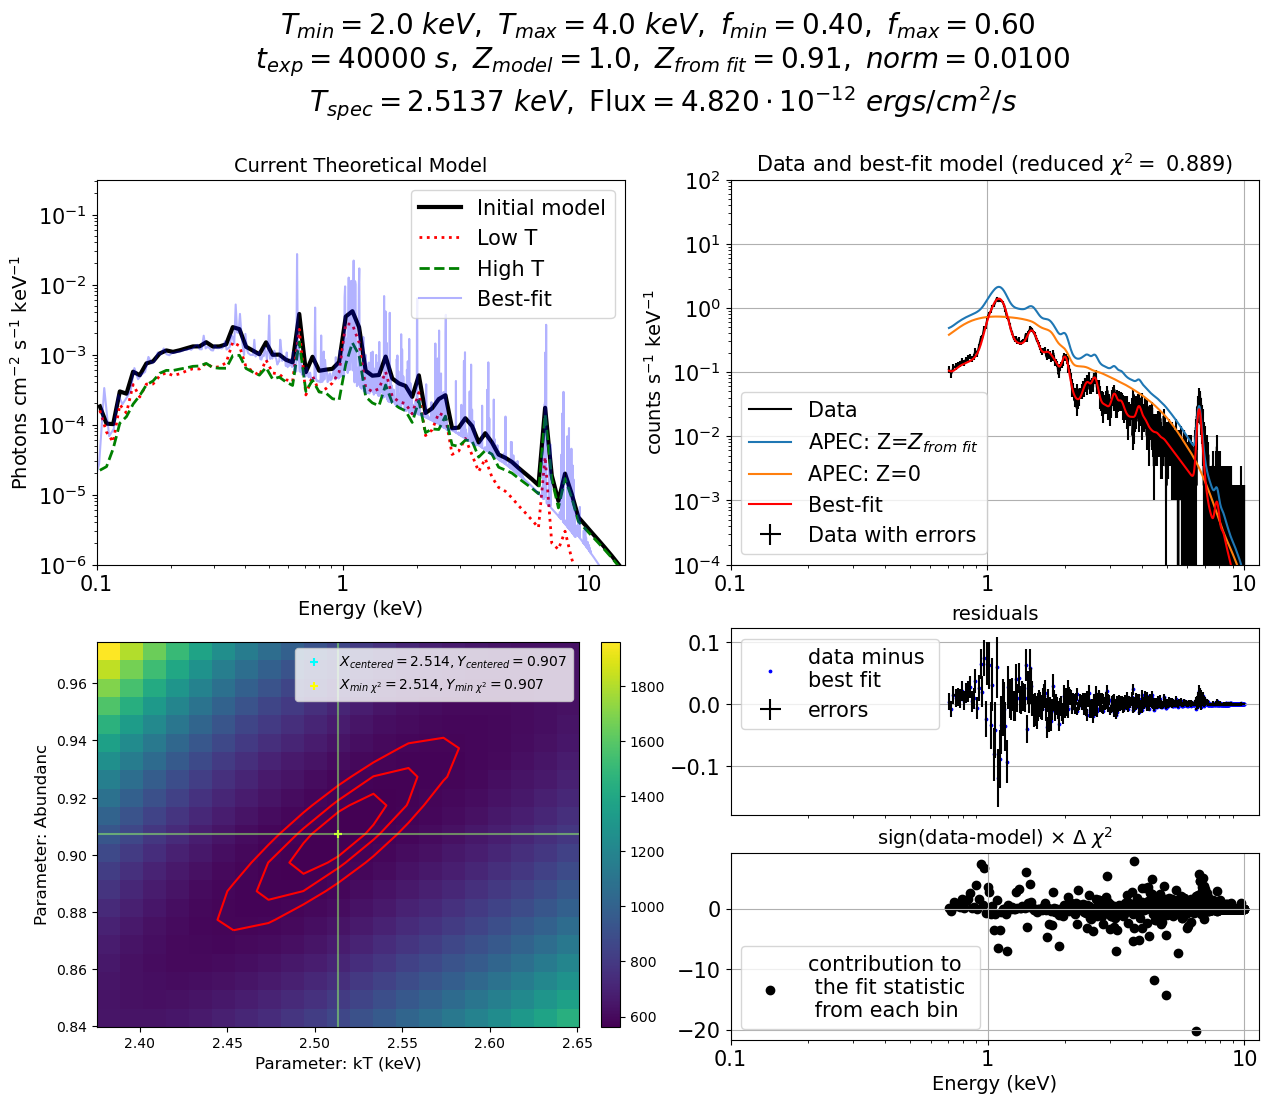

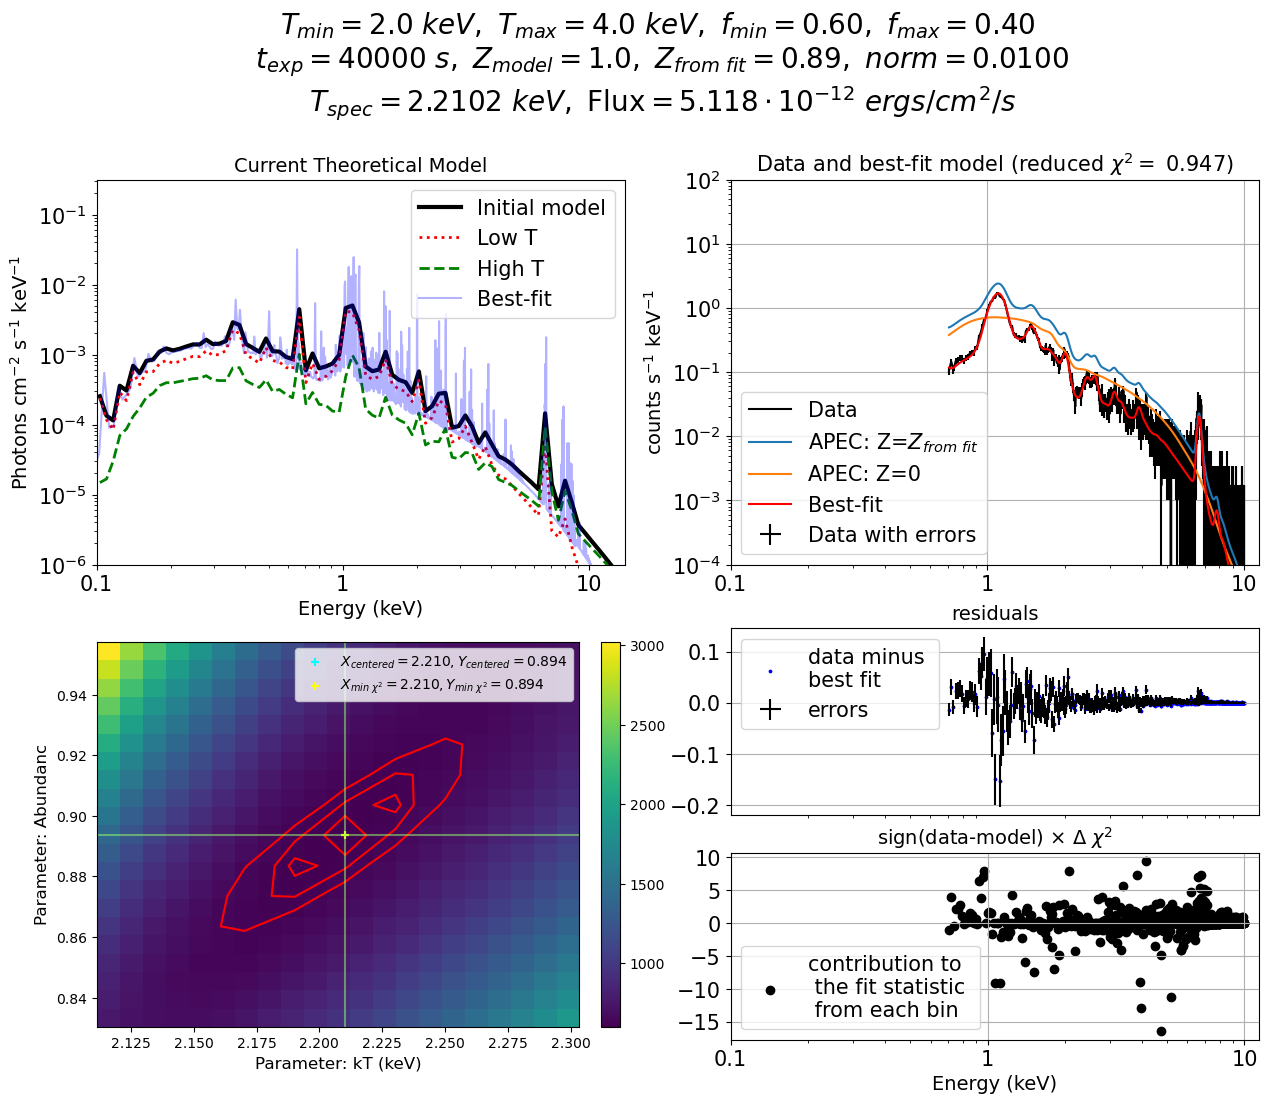

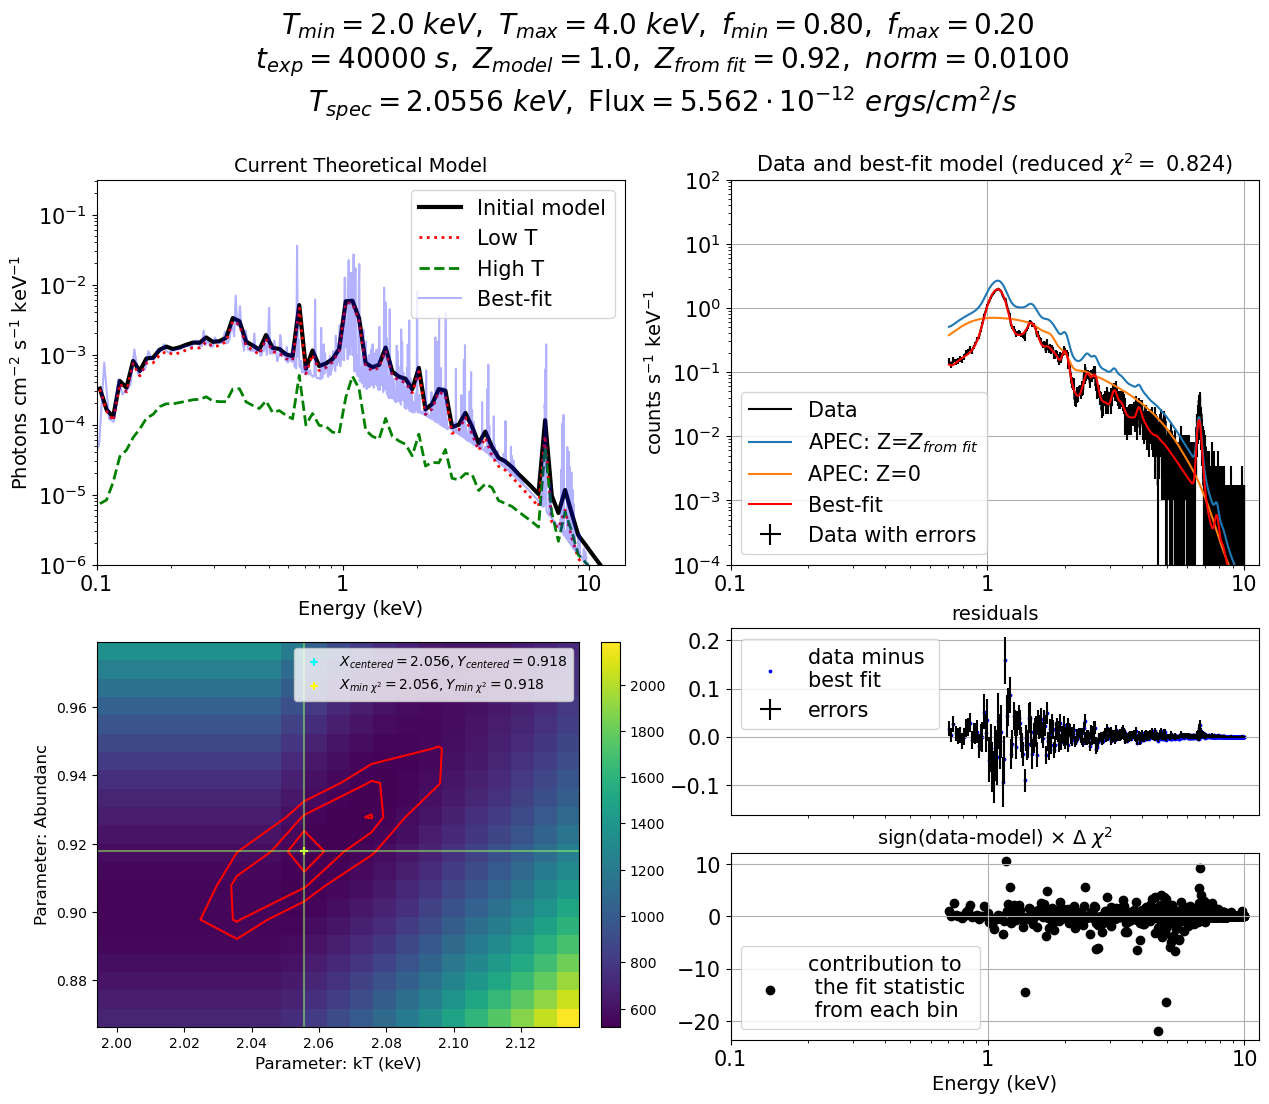

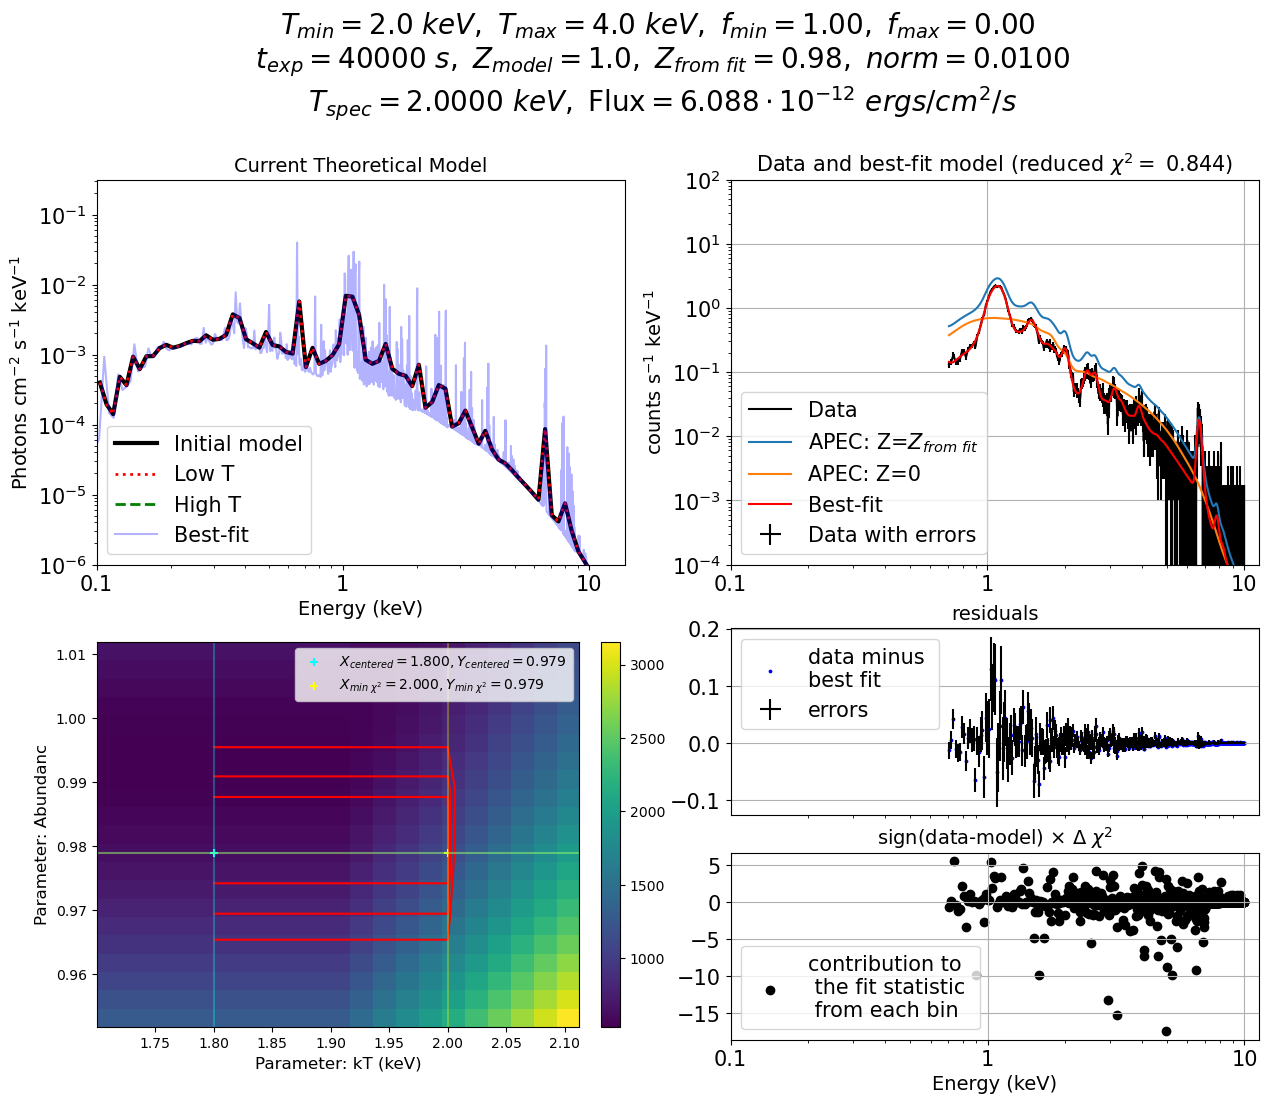

T:  [3.7053159619914666, 2.9641794485299755, 2.513697627250334, 2.2102357225690645, 2.0556239571555612, 2.0]
F:  [4.3436435117351745e-12, 4.532643362691826e-12, 4.820262415850939e-12, 5.118288400026603e-12, 5.562192698555905e-12, 6.087978070286275e-12]


In [586]:
def model_lines_only(T_minnn, T_maxxx, f_minnn, f_maxxx, abund, nrm, cfluxxx=False):
        
    if not cfluxxx:
        mod = x.Model('phabs*(const*(apec+const*apec)+const*(apec+const*apec))')
        mod.setPars(0.01, f_minnn, T_minnn, abund, 0, nrm, 1., T_minnn, 0.0, 0, nrm, f_maxxx, T_maxxx, abund, 0, nrm, 1., T_maxxx, 0, 0, nrm)
        mod(7).values =  "-1, -1, -1, -1, 1, 1"
        mod(17).values = "-1, -1, -1, -1, 1, 1"
        mod(7).frozen = True
        mod(17).frozen = True
        mod(8).link = "3"   # Tmin
        mod(10).link = "5"  # redshift
        mod(11).link = "6"  # norm
        mod(18).link = "13" # Tmax
        mod(20).link = "15" # redshift
        mod(21).link = "16" # norm
    else:
        mod = x.Model('phabs*cflux*(const*(apec+const*apec)+const*(apec+const*apec))')
        mod.setPars(0.01, 0.4, 2.0, -12., f_minnn, T_minnn, abund, 0, 1, 1., T_minnn, 0.0, 0, 1, f_maxxx, T_maxxx, abund, 0, 1, 1., T_maxxx, 0, 0, 1)
        mod(10).values =  "-1, 0.0001, -1, -1, 1, 1"
        mod(20).values = "-1, 0.0001, -1, -1, 1, 1"
        mod(10).frozen = True
        mod(20).frozen = True
        mod(11).link = "6"
        mod(13).link = "8"
        mod(14).link = "9"
        mod(21).link = "16"
        mod(23).link = "18"
        mod(24).link = "19"
        mod(9).frozen = True
        mod(19).frozen = True
        mod(9).values = "1, -1, 0.0, 0.0, 1.1, 1.1"
        mod(19).values = "1, -1, 0.0, 0.0, 1.1, 1.1"
        
    x.AllModels.show()
    
    return mod

    #x.Plot.show()
    #x.AllModels.setEnergies("0.1 10.0 10 log")

def single_T_fit_lines(T_minnn, T_maxxx, N_fmins, abund, telescope_name, nrm, texp, stpar=False, plot=False, Xplot=False):
        
    x.AllData.clear()
    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=100)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
    
    if Xplot:
        x.Plot.device = "/xs"
    else:
        x.Plot.device = '/null'

    tspec_list = []
    flux_list = []

    for l in range(0, N_fmins):
        
        f_minnn = 0.0+1/(N_fmins-1)*(l)
        f_maxxx = 1-f_minnn
           
        # set model for fakeit
        mod = model_lines_only(T_minnn, T_maxxx, f_minnn, f_maxxx, abund, nrm, cfluxxx=False)
        x.AllModels.show()
        #x.AllModels.setEnergies("reset")
        
        # plot model
        if plot:
            plt.figure(figsize=(15, 17))
            plt.subplot(3,2,1)
            draw_model(nrm, linesandcont=True)

        # data from fake spectrum
        perform_fakeit(telescope_name, str(texp))
        x.AllData.ignore("**-0.7 10.0-**")             # IMPORTANT !
        x.AllData.show()

        # fitting
        x.AllModels.clear()
        mod2fit = x.Model("phabs*(apec+const*apec)")
        mod2fit.setPars(0.01, 1.0, abund, 0., nrm, 1, 1., 0.0, 0.0, nrm)
        mod2fit(1).frozen = True   # n_H
        mod2fit(2).values = f"{(T_minnn+T_maxxx)/2}, 0.001, {T_minnn}, {T_minnn}, {T_maxxx}, {T_maxxx}" # temperature
        mod2fit(3).frozen = False  # abundance
        #mod2fit(4).frozen = False  # redshift
        mod2fit(5).frozen = True   # norm
        mod2fit(5).values = f"{nrm}, -1, 0.0, 0.0, 1.1, 1.1"
        mod2fit(6).frozen = True   # const = -1
        mod2fit(6).values = "-1, -1, -1, -1, 1, 1"
        mod2fit(7).link = "2"      # temperature
        mod2fit(8).frozen = True   # zero abund for continuum
        mod2fit(9).link = "4"      # redshift
        mod2fit(10).link = "5"     # norm
        
        #x.AllData.ignore("bad")
        x.Fit.renorm('auto')
        x.Fit.nIterations = 100
        x.Fit.query = 'yes'
        #x.Fit.weight = 'standard'
        x.Fit.statMethod = "chi"
        #x.Fit.delta = 0.001
        x.Fit.perform()
        #x.Fit.goodness(100, sim=False)
        x.Fit.show()
               
        # steppar
        if stpar:
            N_steps = 20
            perform_steppar(mod2fit, 2, 0.2, 3, 0.1, N_steps)

        # return some parameters
        best_kT = mod2fit(2).values[0]
        abund_from_fit = mod2fit(3).values[0]
        norm = mod2fit(5).values[0]
        tspec_list.append(best_kT)
        #print(best_kT)
        
        # calculating flux
        x.AllModels.calcFlux('0.7 10.0')
        fluxx = x.AllData(1).flux[0]
        flux_list.append(fluxx) # in units of ergs/cm2/s or use [4] in units of photons / s / cm^2
    
        if plot:
            plt.suptitle(f'$T_{{min}}={T_minnn} \ keV, \ T_{{max}}={T_maxxx} \ keV, \ f_{{min}}={f_minnn:.2f}, \ f_{{max}}={f_maxxx:.2f}$ \n $t_{{exp}}={texp} \ s, \ Z_{{model}} ={abund}, \ Z_{{from \ fit}} = {abund_from_fit:.2f}, \ norm = {norm:.4f}$ \n $T_{{spec}}={best_kT:.4f} \ keV, \ $Flux$ = {fluxx*10**12:.3f}\cdot 10^{{-12}} \ ergs/cm^2/s$ \n ', fontsize = 20)
            plt.subplot(3,2,3)
            if stpar:
                plot_contours_from_steppar(N_steps, 2, 3, mod2fit, zoomin=True)
            else:
                draw_best_model(nrm, linesandcont=True)
                #draw_goodness()
            plt.subplot(3,2,2)
            draw_data_and_best_model(nrm, linesandcont=True)
            plt.subplot(3,2,1)
            draw_best_model(nrm, linesandcont=False)
            plt.show()

        #x.Plot.commands=()
        x.AllData.clear()
        x.AllModels.clear()

    return tspec_list, flux_list

fitlisttttt, fluxxxx = single_T_fit_lines(2.0, 4.0, 6, 1.0, 'Chandra', nrm=0.01, texp=40000, stpar=True, plot=True, Xplot=False)
print("T: ", fitlisttttt)
print("F: ", fluxxxx)

## Замечания и дополнения:

1) `churazov` weights - для слабых источников

2) [statistic](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node119.html), [steppar](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node86.html), [error](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node79.html), [error codes](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node60.html#tclouterror)

3) Калибровка через `cflux`

4) Добавить возможность менять $n_H$

5) Научиться добавлять фон: `background`

6) [Appendix B: Statistics in XSPEC](https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node319.html#AppendixStatistics)

## 1.3 Figure 3

Reading from file (obsolete):

`fitlist = pd.read_csv("tspec_list.dat", header=None)[0].to_numpy().astype(float)`

`plt.scatter(np.linspace(0, 1, len(fitlist)), fitlist)`

Calculating one single-temperature fit (it was used for debugging):

`fitlist5 = single_T_fit_lines(0.50, 1.5, 4, 'Chandra', plot=True)`

In [587]:
#Tspec_lines_all[str(0.5)+'-'+str(1.5)] = single_T_fit_lines(0.5, 1.5, 3, telescope, plot = True)

Вычисляем всё необходимое в PyXspec:

In [588]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

T_mins = (0.25, 0.5, 1., 0.5, 1.0)
T_maxs = (0.5, 1.0, 2.0, 1.5, 3.0)

Tspec_lines_all = {}

for T_min, T_max in list(zip(T_mins, T_maxs)):

    tspec_list = single_T_fit_lines(T_min, T_max, 21, 1.0, telescope, nrm=0.01, texp=40000, stpar=True, plot = False)[0]
    Tspec_lines_all[str(T_min)+'-'+str(T_max)] = tspec_list
    
    print(str(T_min)+'-'+str(T_max)+": done")
    
#print(Tspec_lines_all)
for key in Tspec_lines_all.keys():
    print(key, 'keV')
    print([f'{vl:.2f}' for vl in Tspec_lines_all[key]], '\n')

0.25-0.5: done
0.5-1.0: done
1.0-2.0: done
0.5-1.5: done
1.0-3.0: done
0.25-0.5 keV
['0.50', '0.50', '0.49', '0.48', '0.48', '0.48', '0.47', '0.47', '0.45', '0.44', '0.42', '0.40', '0.38', '0.37', '0.35', '0.33', '0.32', '0.31', '0.29', '0.27', '0.25'] 

0.5-1.0 keV
['1.00', '0.98', '0.96', '0.95', '0.93', '0.91', '0.89', '0.88', '0.85', '0.83', '0.80', '0.76', '0.74', '0.70', '0.67', '0.63', '0.60', '0.58', '0.55', '0.52', '0.50'] 

1.0-2.0 keV
['1.95', '1.70', '1.55', '1.41', '1.32', '1.24', '1.19', '1.16', '1.12', '1.10', '1.08', '1.06', '1.05', '1.05', '1.04', '1.03', '1.02', '1.01', '1.01', '1.00', '1.00'] 

0.5-1.5 keV
['1.49', '1.43', '1.38', '1.33', '1.27', '1.24', '1.18', '1.06', '0.78', '0.70', '0.66', '0.62', '0.62', '0.59', '0.57', '0.57', '0.56', '0.55', '0.53', '0.52', '0.50'] 

1.0-3.0 keV
['2.85', '2.20', '1.58', '1.32', '1.20', '1.13', '1.11', '1.09', '1.07', '1.06', '1.05', '1.04', '1.03', '1.02', '1.02', '1.01', '1.01', '1.01', '1.01', '1.00', '1.00'] 



Рисуем картинку:

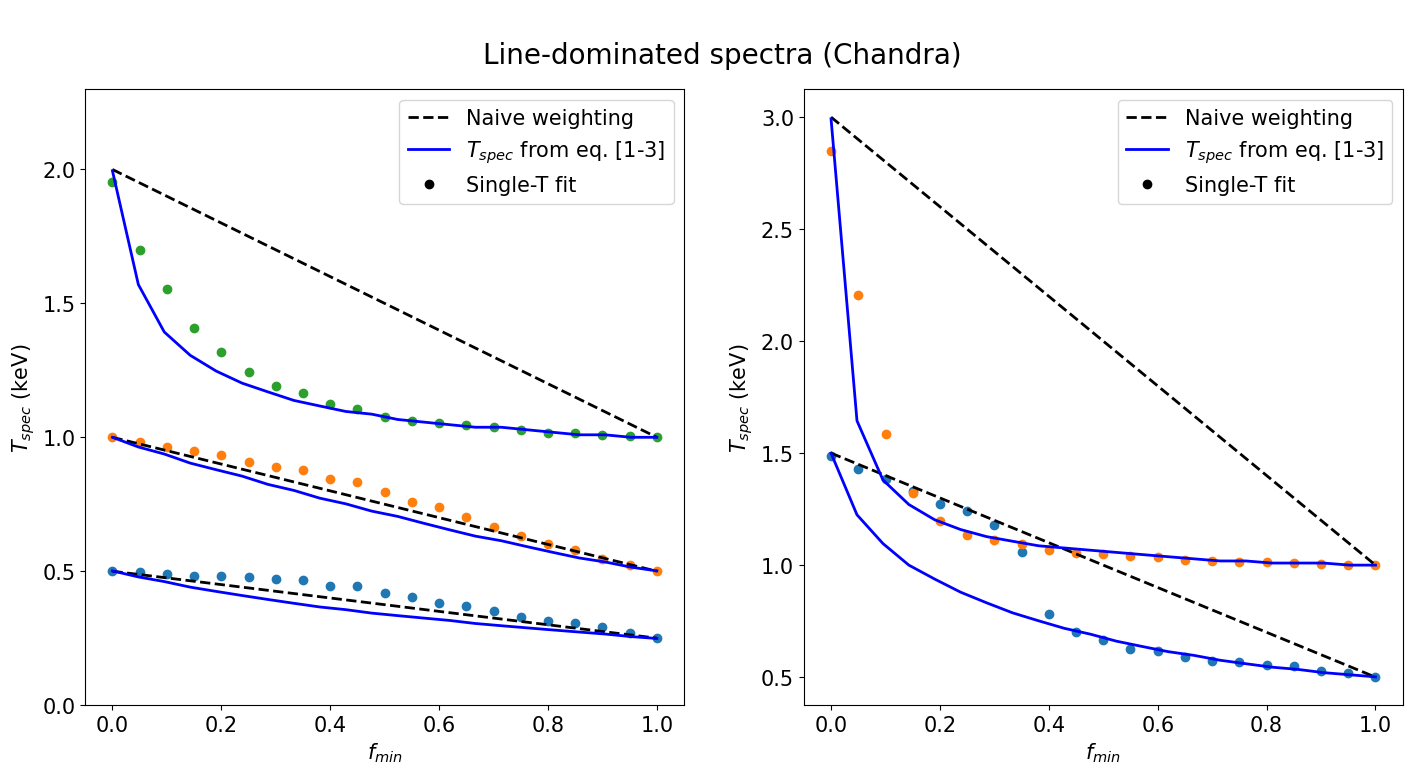

In [589]:
plt.figure(figsize=(17,8))
 
data__name = "data/stats_12.dat"

data = get_data(data__name, show_table=False)

plt.suptitle('\n' + 'Line-dominated spectra (' + telescope + ')', fontsize = 20)

plt.subplot(1,2,1)

T_mins = (0.25, 0.5, 1.)
T_maxs = (0.5, 1.0, 2.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # mean energy
    plot_Tspec_fmin(T_min, T_max, 21, data, naive=True, lstyle='-', cline='blue')
    plot_Tspec_fmin_details()
    
    # direct fit
    Tspec_list = Tspec_lines_all[str(T_min)+'-'+str(T_max)]
    plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list)
    
    #plt.plot(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black', linewidth=1)
    
plt.ylim(0, 2.3)

    
plt.subplot(1,2,2)

T_mins = (0.5, 1.0)
T_maxs = (1.5, 3.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # mean energy
    plot_Tspec_fmin(T_min, T_max, 21, data, naive=True, lstyle='-', cline='blue')
    plot_Tspec_fmin_details()
    
    #plot_Tspec_fmin(T_min, T_max, 20, get_data("data/stats_10.dat", show_table=False), naive=False, lstyle='-', cline='red')
    
    # direct fit
    Tspec_list = Tspec_lines_all[str(T_min)+'-'+str(T_max)]
    plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list)
    
#plt.savefig('Fig3_'+telescope+'_'+data__name[11:13]+'.png')
plt.show()

# 2. CONTINUUM ONLY

To show list of `xspec` commands use `x.Plot.commands`.
If something is not plotting, try `x.Plot.commands=()`.

## 2.1 $T_{spec}$ from weighting

In [590]:
def get_Tspec_continuum_eq45(fminnn, Tmin, Tmax):
    
    # derive T_spec from given values 
    # of T_min, T_max and f_min
    
    Tspec = []
    
    for fmin in fminnn:
        
        temperatures = [Tmin, Tmax]
        weights = temperatures*0

        alpha = 0.75
        
        weights = [temperatures[i]**(-alpha) for i in range(0, len(temperatures))]

        weights = np.multiply(weights, [fmin, (1-fmin)])

        #print(weights)

        num = np.dot(weights, temperatures)
        denom = sum(weights)

        #print(num/denom)
        
        Tspec.append(num/denom)

    return Tspec

#bbb = get_Tspec_continuum_eq45([0.2, 0.3], 1.0, 2.0)
#print(bbb)

# calculating photon count rate for continuum

def c_T(T, T_left, T_right, telescope_name, Xplot=False):
    
    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=1024)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
    
    if telescope_name == 'Chandra':
        RMF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.rmf' 
        ARF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.arf' 
    elif telescope_name == 'SRG/eROSITA':
        RMF_NAME = 'telescopes/erosita/erosita_pirmf_v20210719.rmf'
        ARF_NAME = 'telescopes/erosita/tm1_arf_open_000101v02.fits'

    # set model for fakeit
    
    mod = x.Model('phabs*apec')
    mod.setPars(0.01, T, 0.0, 0, 1)
    x.AllModels.show()
    
    if Xplot:
        x.Plot.device = '/xs'
    else:
        x.Plot.device = '/null'

    # fake spectrum
    fs = x.FakeitSettings(response = RMF_NAME, 
                               arf = ARF_NAME, 
                        background = '', 
                          exposure = '40000', 
                        correction = '', 
                      backExposure = '', 
                          fileName = 'fakeit.pha')
    x.AllData.fakeit(nSpectra = 1, 
                     settings = fs, 
                   applyStats = True,
                   filePrefix = "",
                      noWrite = True)

    x.AllData.ignore(f"**-{T_left} {T_right}-**")             # IMPORTANT !
    
    x.Plot.xAxis = "keV"
    #x.AllData.show()
    x.Plot("ldata")
    #xVals = x.Plot.x()
    #yVals = x.Plot.y()
    
    #s1 = x.AllData(1).rate[0]
    
    x.AllModels.calcFlux('0.7 10.0')
    flx = x.AllData(1).flux[0]
     
    #print(s1)

    return flx

#for i in range(0, 100):
#    ddd = c_T(0.01+i/10, 0.7, 10.0, 'Chandra', True)
#    print(ddd)

def get_Tspec_continuum_eq46(fminnn, Tmin, Tmax, alpha, telescope_name):
    
    # derive T_spec from given values 
    # of T_min, T_max and f_min
    
    Tspec = []
    
    for fmin in fminnn:
        
        temperatures = [Tmin, Tmax]
        weights = temperatures*0

        #alpha = 0.875
        
        weights = [temperatures[i]**(-alpha) for i in range(0, len(temperatures))]

        weights = np.multiply(weights, [fmin, (1-fmin)])
        
        c_T_min = c_T(Tmin, 0.7, 10.0, telescope_name, Xplot=False)
        c_T_max = c_T(Tmax, 0.7, 10.0, telescope_name, Xplot=False)
        
        weights = np.multiply(weights, [c_T_min, c_T_max])

        #print(weights)

        num = np.dot(weights, temperatures)
        denom = sum(weights)

        #print(num/denom)
        
        Tspec.append(num/denom)

    return Tspec

#bbb = get_Tspec_continuum_eq46(np.linspace(0, 1, 21), 1.0, 2.0, 0.875, 'Chandra')
#print(bbb)

## 2.2 $T_{spec}$ from direct fit

### Mazotta-like fit
Single-T fit for mixture of 2 continuums (now working properly):

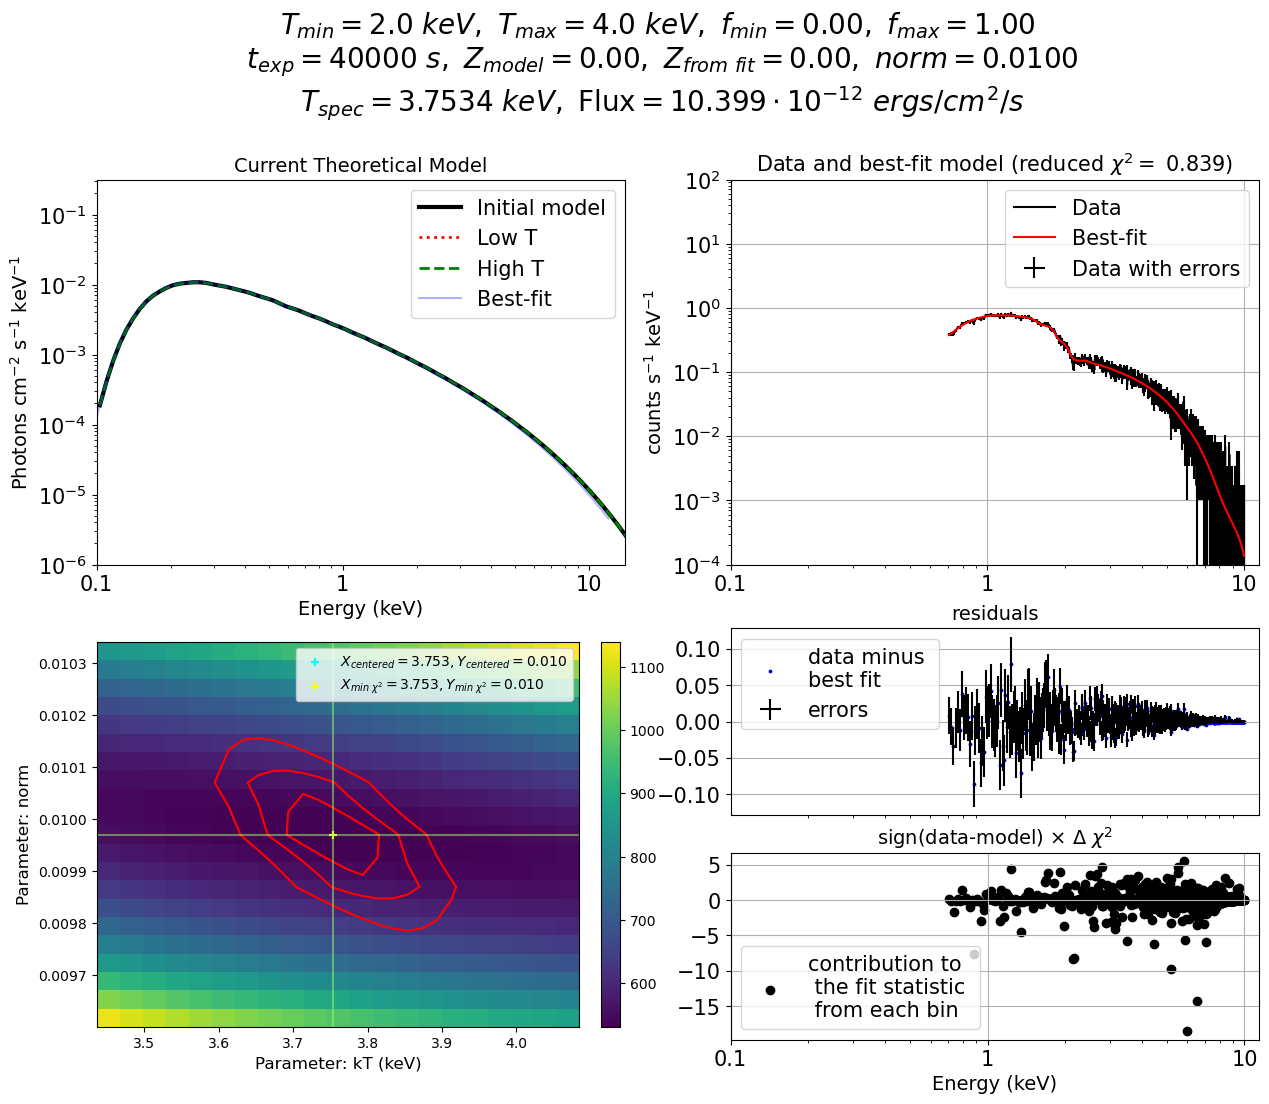

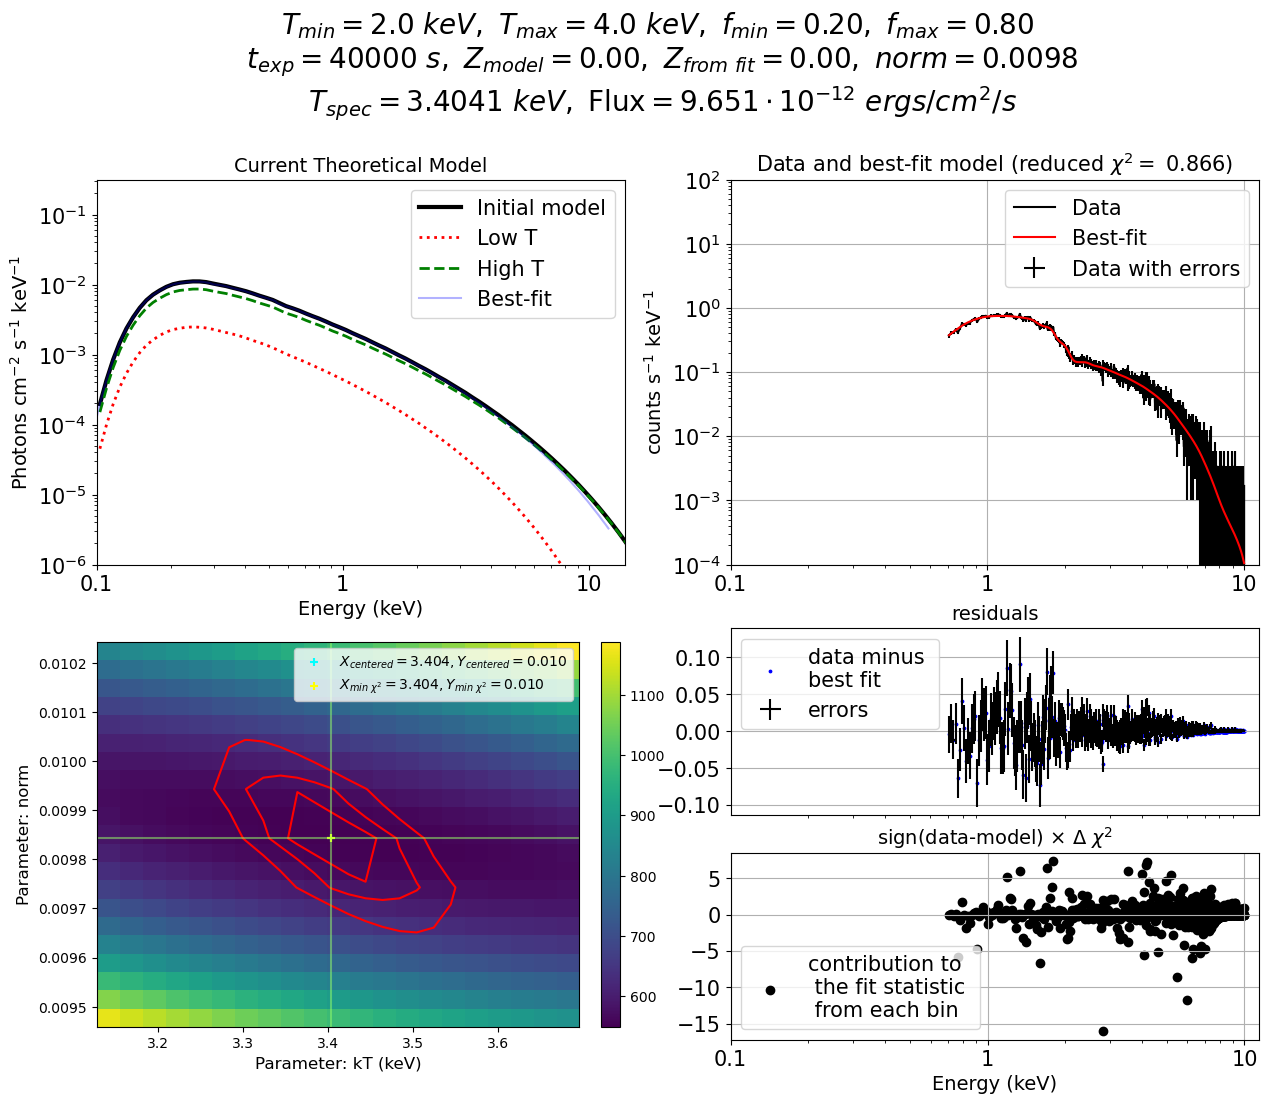

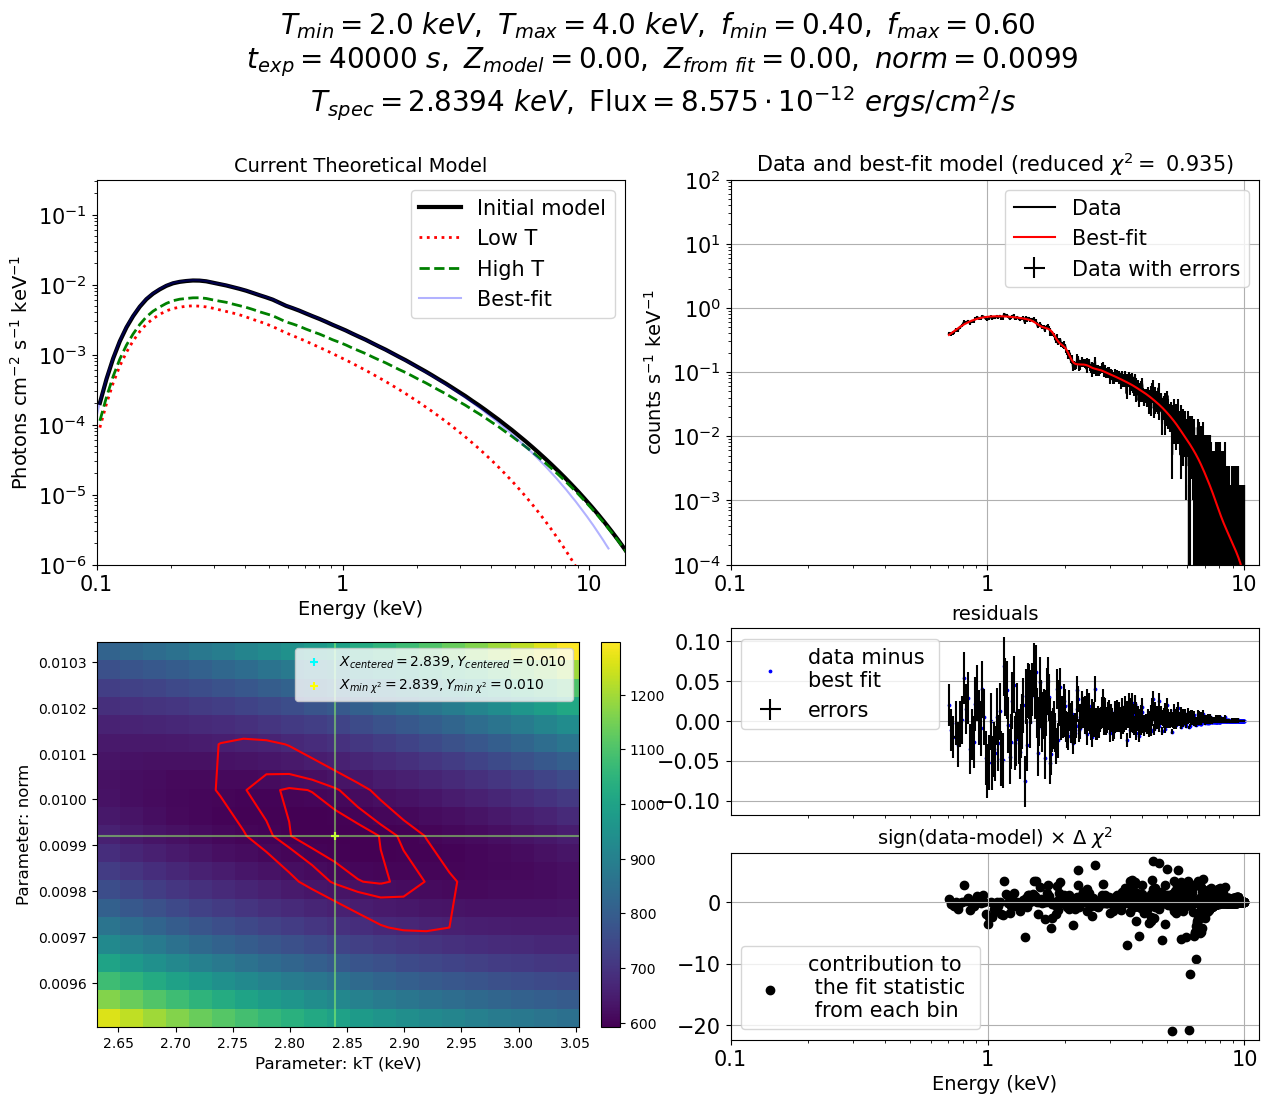

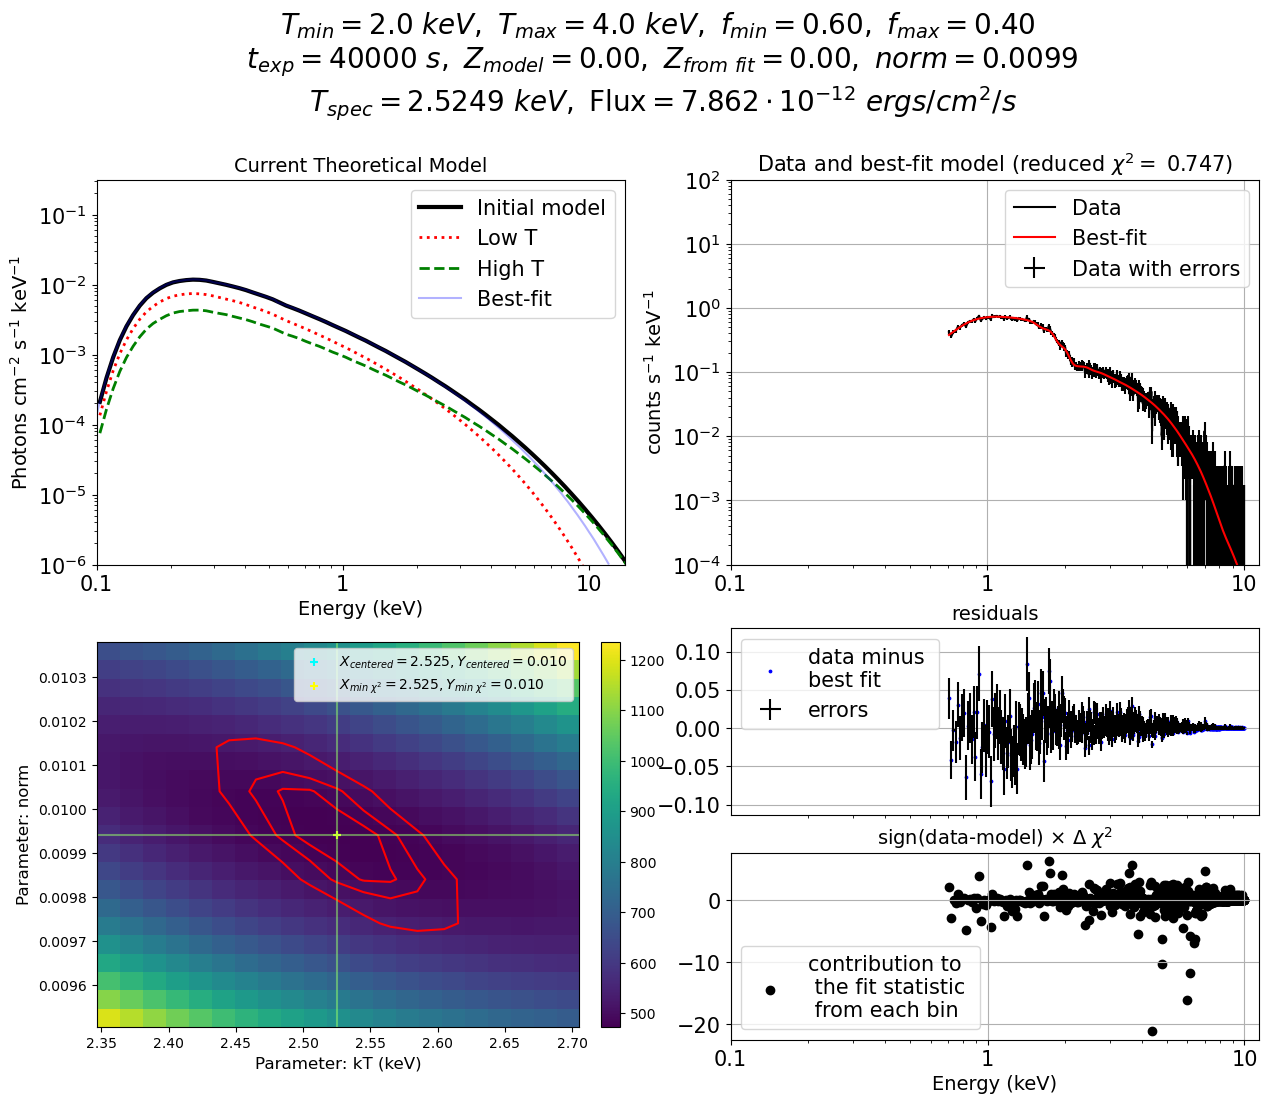

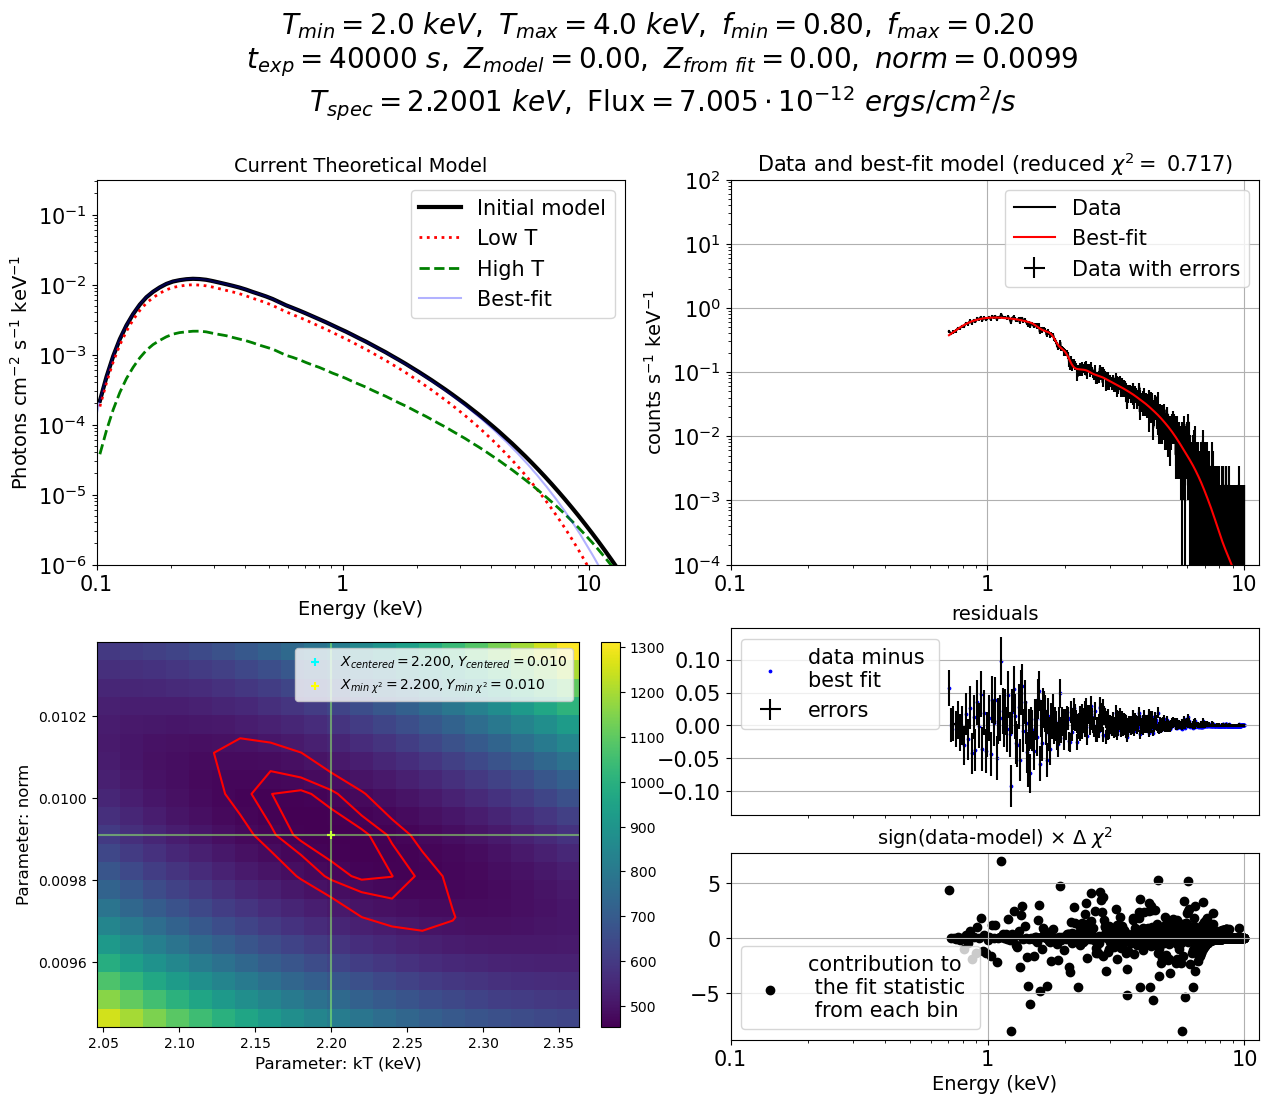

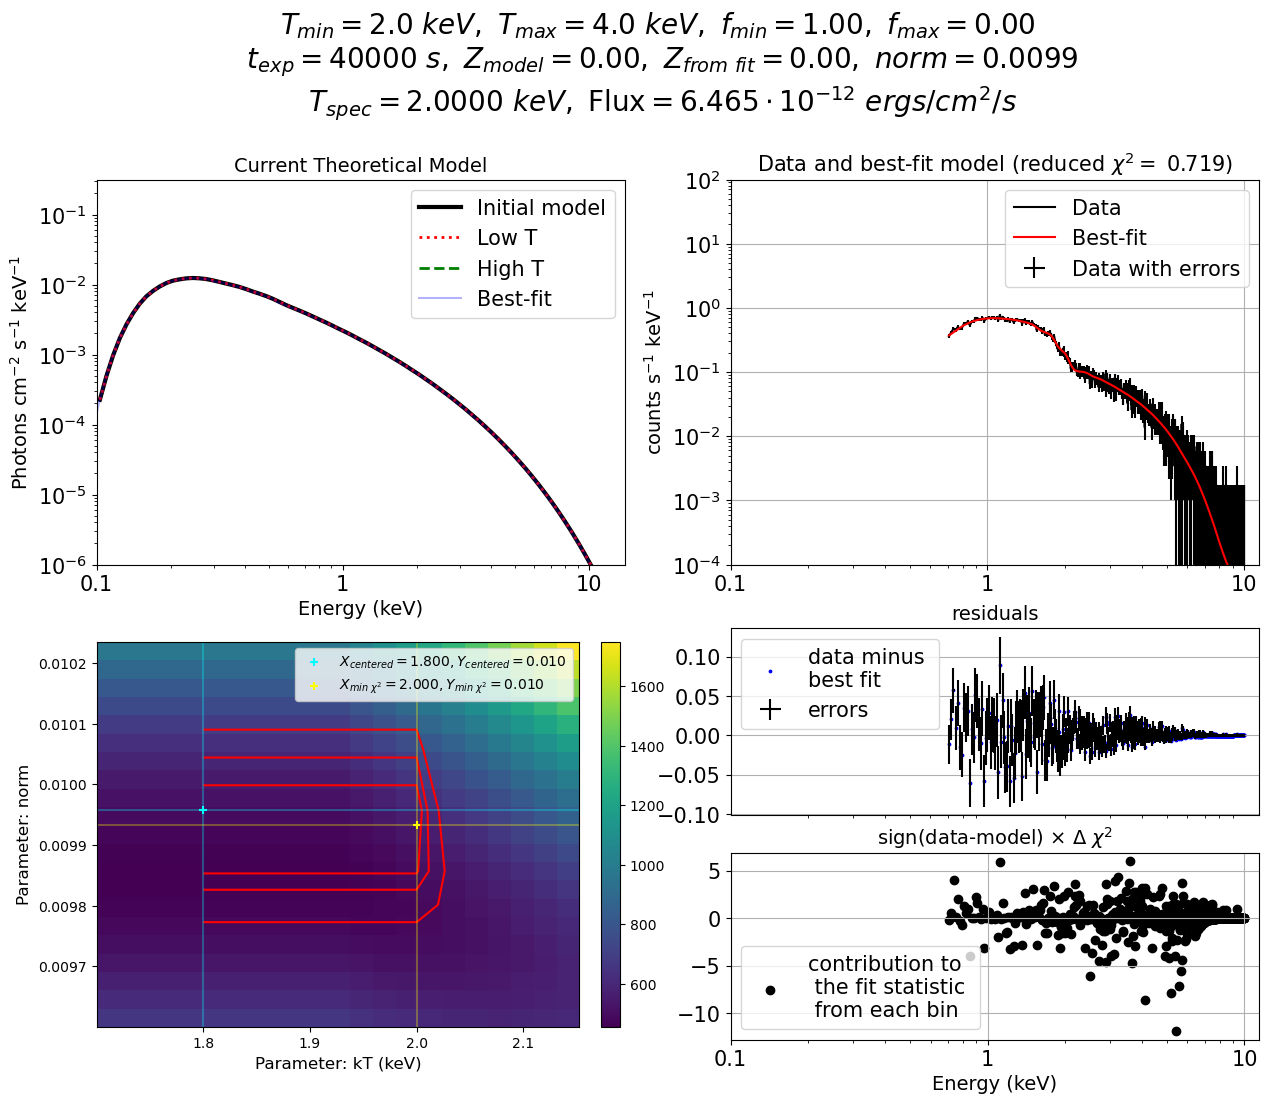

T:  [3.753364345613911, 3.4041002565103646, 2.839421412189959, 2.5248530104809057, 2.2000944280902237, 2.0]
F:  [1.0399495834156489e-11, 9.650676387399596e-12, 8.575036701171047e-12, 7.861875702491056e-12, 7.005299552637253e-12, 6.4645424481101666e-12]


In [591]:
logFile = x.Xset.openLog("newLogFile.txt")

def single_T_fit_continuum(T_minnn, T_maxxx, N_fmins, telescope_name, nrm, texp, stpar=False, plot=False, Xplot=False):

    x.AllData.clear()
    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=100)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
        
    if Xplot:
        x.Plot.device = "/xs"
    else:
        x.Plot.device = '/null'

    tspec_list = []
    flux_list = []

    for l in range(0, N_fmins):

        f_minnn = 0.0 + 1/(N_fmins-1)*(l)
        f_maxxx = 1-f_minnn
        
        # set model for fakeit
        mod = x.Model('phabs*(const*apec+const*apec)')
        mod.setPars(0.01, f_minnn, T_minnn, 0.0, 0, nrm, f_maxxx, T_maxxx, 0.0, 0, nrm)
        mod(9).link = "4"
        mod(10).link = "5"
        mod(11).link = "6"
        x.AllModels.show()
        
        #x.AllModels.setEnergies("0.1 10.0 5 log")
        x.AllModels.setEnergies("reset")
        
        # plot model
        if plot:
            plt.figure(figsize=(15, 17))
            plt.subplot(3,2,1)
            draw_model(nrm, linesandcont=False)
            
        # data from fake spectrum
        perform_fakeit(telescope_name, str(texp))
        x.AllData.ignore("**-0.7 10.-**")     # IMPORTANT !
        x.AllData.show()
        
        # fitting
        x.AllModels.clear()
        mod2fit = x.Model("phabs*apec")
        mod2fit.setPars(0.01, 1.0, 0.0, 0., nrm)
        mod2fit(1).frozen = True    #n_H
        mod2fit(2).values = f"{(T_minnn+T_maxxx)/2}, 0.001, {T_minnn}, {T_minnn}, {T_maxxx}, {T_maxxx}" # temperature
        #mod2fit(3).frozen = False  #abundance
        #mod2fit(4).frozen = False  # redshift
        #mod2fit(5).frozen = True   # norm
        #mod2fit(5).values = f"{nrm}, 0.01, 0.0, 0.0, 1.1, 1.1"
        
        #x.AllData.ignore("bad")
        x.Fit.renorm('auto')
        x.Fit.nIterations = 100
        x.Fit.query = 'yes'
        #x.Fit.weight = 'standard'
        x.Fit.statMethod = 'chi'
        x.Fit.perform()
        #x.AllModels.show()
        x.Fit.show()
        
        # steppar
        if stpar:
            N_steps = 20
            perform_steppar(mod2fit, 2, 0.2, 5, nrm/10, N_steps)

        # return some parameters
        best_kT = mod2fit(2).values[0]
        abund_from_fit = mod2fit(3).values[0]
        norm = mod2fit(5).values[0]
        tspec_list.append(best_kT)
        #print(best_kT)
        
        # calculating flux
        #fluxx = x.AllData(1).rate[0]
        #flux_list.append(fluxx) # in units of counts / s
        x.AllModels.calcFlux('0.7 10.0')
        fluxx = x.AllData(1).flux[0]
        flux_list.append(fluxx) # in units of ergs/cm2/s
        # or use [4] in units of photons / s / cm^2
        
        if plot:
            plt.suptitle(f'$T_{{min}}={T_minnn} \ keV, \ T_{{max}}={T_maxxx} \ keV, \ f_{{min}}={f_minnn:.2f}, \ f_{{max}}={f_maxxx:.2f}$ \n $t_{{exp}}={texp} \ s, \ Z_{{model}} =0.00, \ Z_{{from \ fit}} = {abund_from_fit:.2f}, \ norm = {norm:.4f}$ \n $T_{{spec}}={best_kT:.4f} \ keV, \ $Flux$ = {fluxx*10**12:.3f}\cdot 10^{{-12}} \ ergs/cm^2/s$ \n ', fontsize = 20)
            plt.subplot(3,2,3)
            if stpar:
                plot_contours_from_steppar(N_steps, 2, 5, mod2fit, zoomin=True)
            else:
                draw_best_model(nrm, linesandcont=False)
                #draw_goodness()
            plt.subplot(3,2,2)
            draw_data_and_best_model(nrm, linesandcont=False)
            plt.subplot(3,2,1)
            draw_best_model(nrm, linesandcont=False)
            plt.show()
            
        #x.Plot.commands=()
        x.AllData.clear()

    return tspec_list, flux_list
    
ccc, fluxccc = single_T_fit_continuum(2.0, 4.0, 6, 'Chandra', nrm=0.01, texp=40000, stpar=True, plot=True, Xplot=False)
print("T: ", ccc)
print("F: ", fluxccc)

## 2.3 Figure 4

Вычисляем всё необходимое:

In [598]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

if telescope == 'Chandra':
    alpha_current = 0.875
else:
    alpha_current = 0.73
    
print(alpha_current)

f_min = np.linspace(0, 1, 11)
T_spec = f_min*0

T_mins = (0.25, 0.5, 1.0, 2.0, 4.0)
T_maxs = (1.0,  2.0, 4.0, 8.0, 16.0)

Tspec_from_eq46 ={}
Tspec_from_fit ={}

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # Tspec from equations 4, 6
    tspec_list = get_Tspec_continuum_eq46(f_min, T_min, T_max, alpha_current, telescope)
    Tspec_from_eq46[str(T_min)+'-'+str(T_max)] = tspec_list
    
    # Tspec from direct fit
    tspec_list_1 = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, 0.01, 40000, stpar=True, plot=False, Xplot=False)[0]
    Tspec_from_fit[str(T_min)+'-'+str(T_max)] = tspec_list_1
    
    print(str(T_min)+'-'+str(T_max)+": done")
    
#for key in Tspec_from_eq46.keys():
#    print(key, 'keV')
#    print('Eqs. 4, 6:', [f'{vl:.2f}' for vl in Tspec_from_eq46[key]], '\n')
#    print('Direct fit', [f'{vl:.2f}' for vl in Tspec_from_fit[key]], '\n')

0.875
0.25-1.0: done
0.5-2.0: done
1.0-4.0: done
2.0-8.0: done
4.0-16.0: done


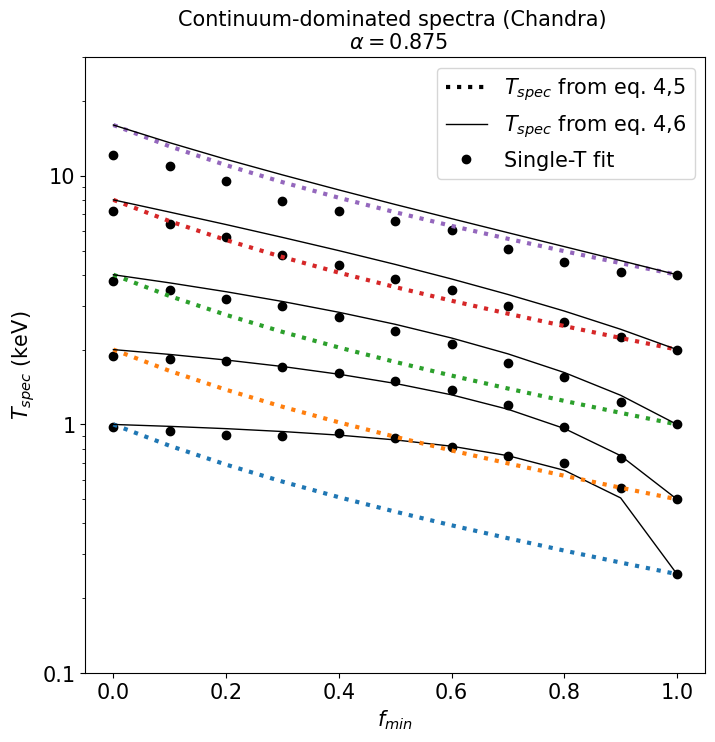

In [599]:
plt.figure(figsize=(8,8))

#telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

T_mins = (0.25, 0.5, 1.0, 2.0, 4.0)
T_maxs = (1.0,  2.0, 4.0, 8.0, 16.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # naive weighting
    #plt.plot(f_min, f_min*T_min+(1-f_min)*T_max, linestyle = '--', linewidth=2, color='black')
    
    # Tspec from equations 4, 5
    plt.plot(f_min, get_Tspec_continuum_eq45(f_min, T_min, T_max), linestyle = ':', linewidth = 3)

    # Tspec from equations 4, 6
    Tspec_list = Tspec_from_eq46[str(T_min)+'-'+str(T_max)]
    plt.plot(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black', linewidth=1)
    #plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black')
    
    # Tspec from direct fit
    Tspec_list1 = Tspec_from_fit[str(T_min)+'-'+str(T_max)]
    plt.scatter(np.linspace(0, 1, len(Tspec_list1)), Tspec_list1, color='black')
    
#plt.scatter(np.linspace(0, 1, len(T_spec)), T_spec, color='blue')   
    
plt.ylim(0.1, 30)
plt.yscale('log')
plt.xticks(size=15)
plt.yticks([0.1, 1, 10], [0.1, 1, 10], size=15)
plt.xlabel('$f_{min}$', fontsize = 15)
plt.ylabel('$T_{spec}$ (keV)', fontsize = 15)
plt.title('Continuum-dominated spectra ('+telescope+') \n $\\alpha=$'+str(alpha_current), fontsize = 15)

handles, labels = plt.gca().get_legend_handles_labels()
#line_n = Line2D([], [], label='Naive weighting', color='black', linestyle='--', linewidth=2)
line_e = Line2D([], [], label='$T_{spec}$ from eq. 4,5', color='black', linestyle=':', linewidth=3)
dots_f = Line2D([], [], label='$T_{spec}$ from eq. 4,6', color='black', linestyle='-', linewidth=1)
dots_T = Line2D([], [], label='Single-T fit', color='black', marker='.', linewidth=0, markersize=12)
handles.extend([line_e, dots_f, dots_T])
plt.legend(handles=handles, fontsize=15)

#plt.savefig('Fig4_'+str(telescope)+'.png')
plt.show()

## 2.4 Searching for $\alpha_{min}$

Let's try to find the value of $\alpha$ at which $T_{sl}$ from equations 4,6 is the closest to $T_{spec}$ from direct fit. Observations by SRG/eROSITA and also by Chandra are considered. See eq. (13) from Mazzotta et al. (2004): https://arxiv.org/pdf/astro-ph/0404425.pdf

$\Delta=\frac{1}{N} \sum_{T_1, T_2} \sqrt{\left(\frac{T_{\mathrm{sl}} - T_{\mathrm{spec}}}{T_{\mathrm{spec}}}\right)^2}$

In [78]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

deltas = []
#alphas = np.linspace(0.350, 0.950, 3)  #Chandra
alphas = np.linspace(0.650, 0.850, 5)  #eROSITA

#[0.875, 0.900, 0.925, 0.950, 0.975, 1.000]
#[0.750, 0.775, 0.800, 0.825, 0.850, 0.875, 0.900]

f_min = np.linspace(0, 1, 21)

for a in alphas:

    delta_sum = 0
    N_deltasum = 0

    T_mins = (0.25, 0.5, 1.0, 2.0, 4.0)
    T_maxs = (1.0,  2.0, 4.0, 8.0, 16.0)

    #T_min = 0.5
    #T_max = 2.0

    for T_min, T_max in list(zip(T_mins, T_maxs)):

        # Tspec from equations 4, 6
        T_sl = get_Tspec_continuum_eq46(f_min, T_min, T_max, a, telescope)
        #print(T_sl)

        # Tspec from direct fit
        #T_spec = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, 0.7, plot=False, Xplot=False)[0]
        T_spec = Tspec_from_fit[str(T_min)+'-'+str(T_max)]
        #print(T_spec)

        #print(T_spec)
        difference = [Ta-Tb for Ta, Tb in zip(T_sl, T_spec)]
        #print(difference)
        terms = [num/denom for num, denom in zip(difference, T_spec)]
        #print(term)
        terms2 = [t**2 for t in terms]
        #print(terms2)
        sqrterms2 = [np.sqrt(tt) for tt in terms2]
        
        delta_term = np.sum(sqrterms2)

        delta_sum = delta_sum + delta_term
        
        N_deltasum = N_deltasum + len(f_min)
        
        print(N_deltasum, end=" ")
        
    Delta = delta_sum/N_deltasum
    
    print(a, Delta)

    deltas.append(Delta)
    
#print(deltas)

21 42 63 84 105 0.65 0.02067995957254531
21 42 63 84 105 0.7 0.024861328272167256
21 42 63 84 105 0.75 0.03211573321286605
21 42 63 84 105 0.8 0.04085761708662324
21 42 63 84 105 0.85 0.05356651841578203


In [79]:
if telescope == 'Chandra': 
    alphas_CH = alphas
    deltas_CH = deltas
else:
    alphas_ER = alphas
    deltas_ER = deltas

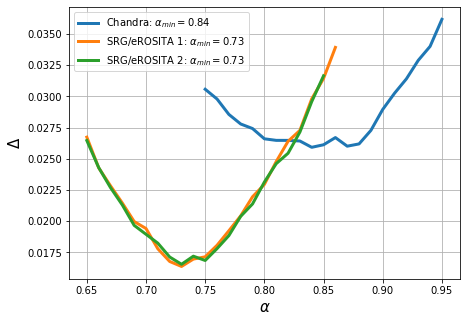

In [67]:
plt.figure(figsize=(7,5))
plt.plot(alphas_CH, deltas_CH, linewidth=3, label='Chandra: $\\alpha_{min} =$'+str(alphas_CH[np.argmin(deltas_CH)]))
plt.plot(list1, list2, linewidth=3, label='SRG/eROSITA 1: $\\alpha_{min} =$'+str(list1[np.argmin(list2)]))
plt.plot(alphas_ER, deltas_ER, linewidth=3, label='SRG/eROSITA 2: $\\alpha_{min} =$'+str(alphas_ER[np.argmin(deltas_ER)]))
plt.xlabel('$\\alpha$', fontsize=15)
plt.ylabel('$\\Delta$', fontsize=15)#, rotation = 'horizontal')
plt.legend()
plt.grid()
#plt.savefig('delta_alpha_ER.png')
plt.show()

We can see that $\Delta$ reaches its minimum at $\alpha=0.73$ (for SRG/eROSITA observations). 

# 3. REALISTIC METALLICITIES

## 3.1 $T_{spec}$ from direct fit

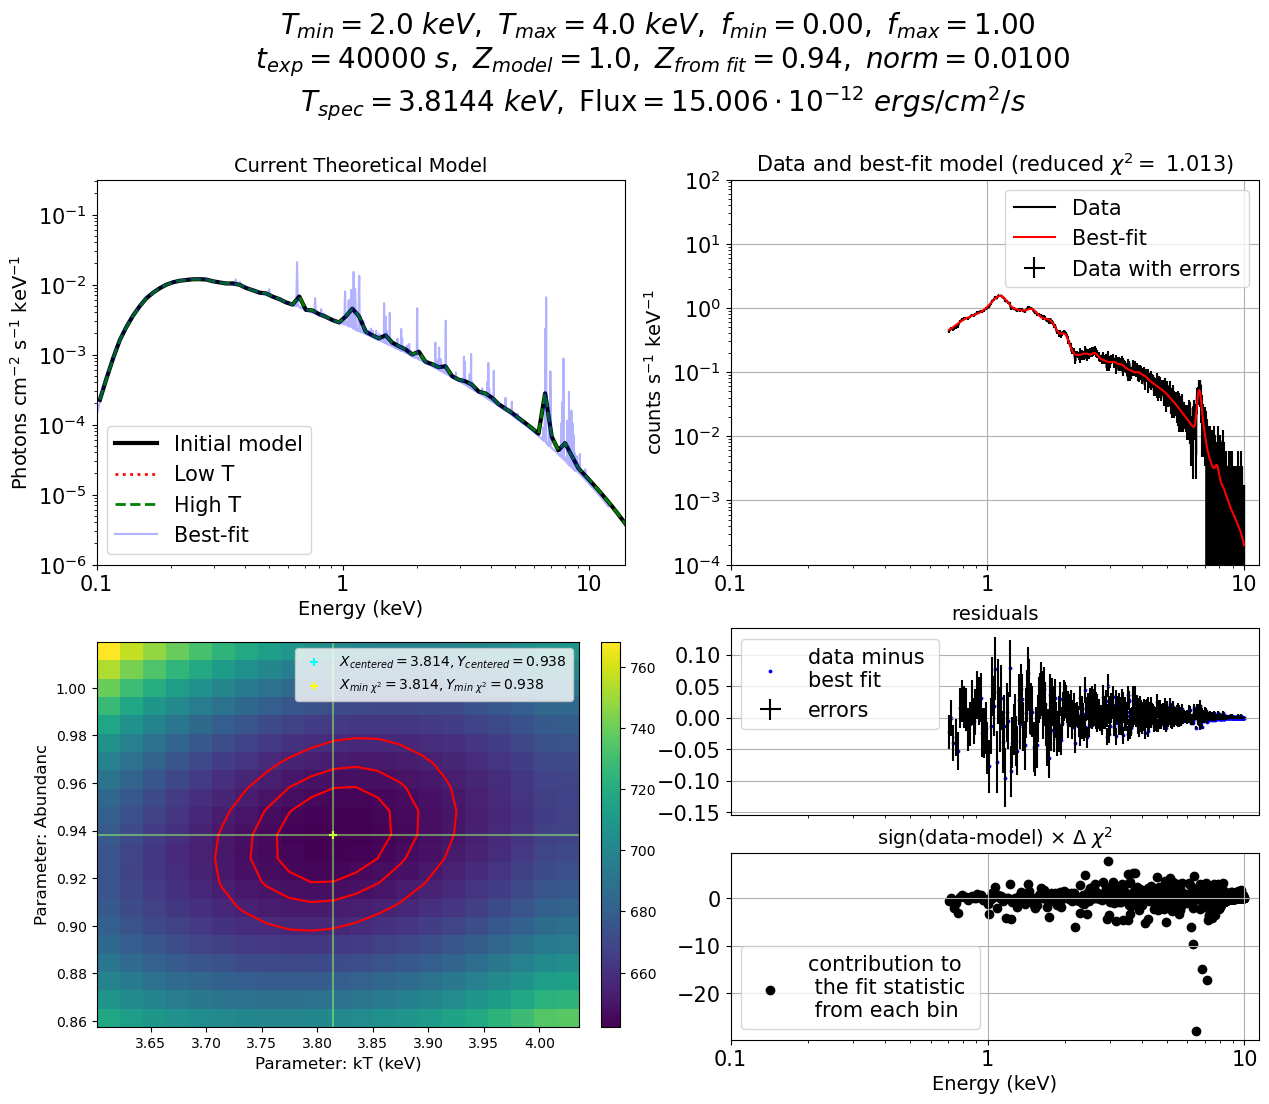

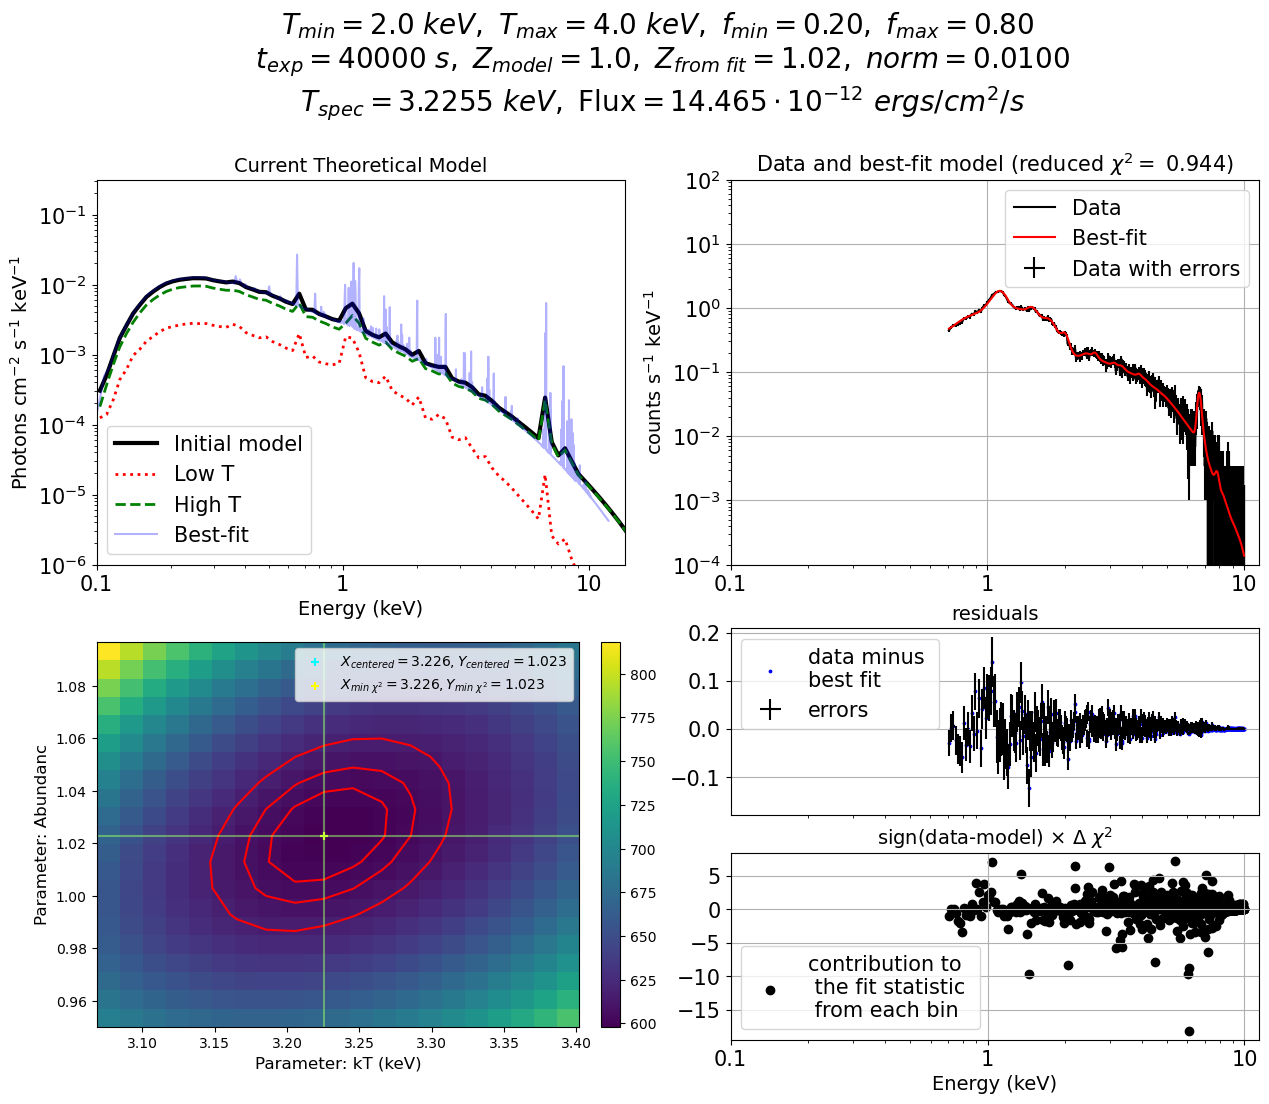

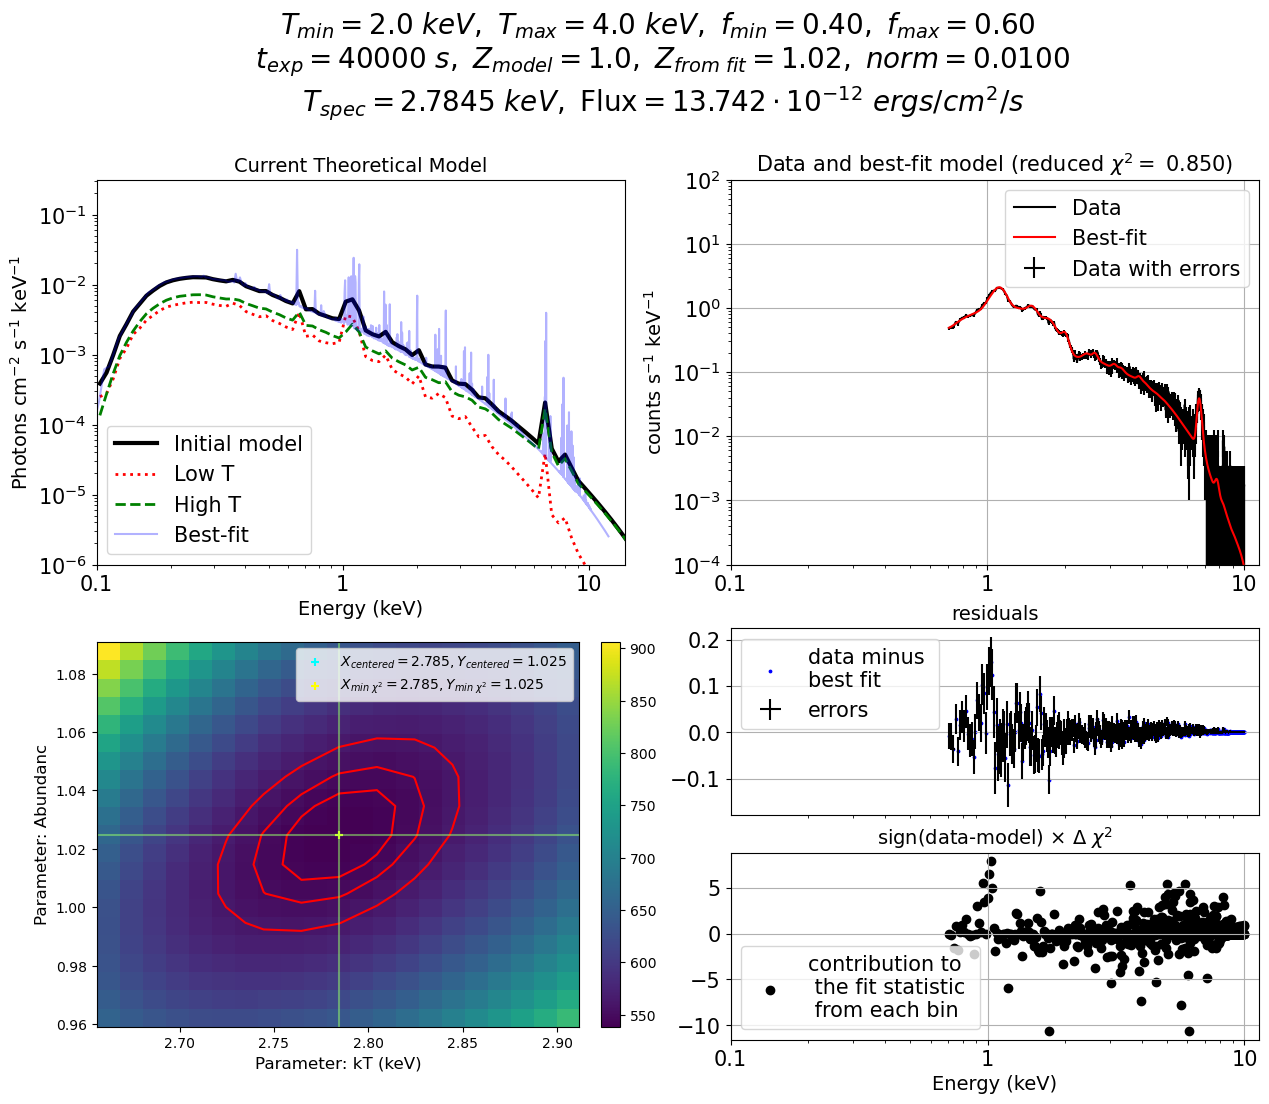

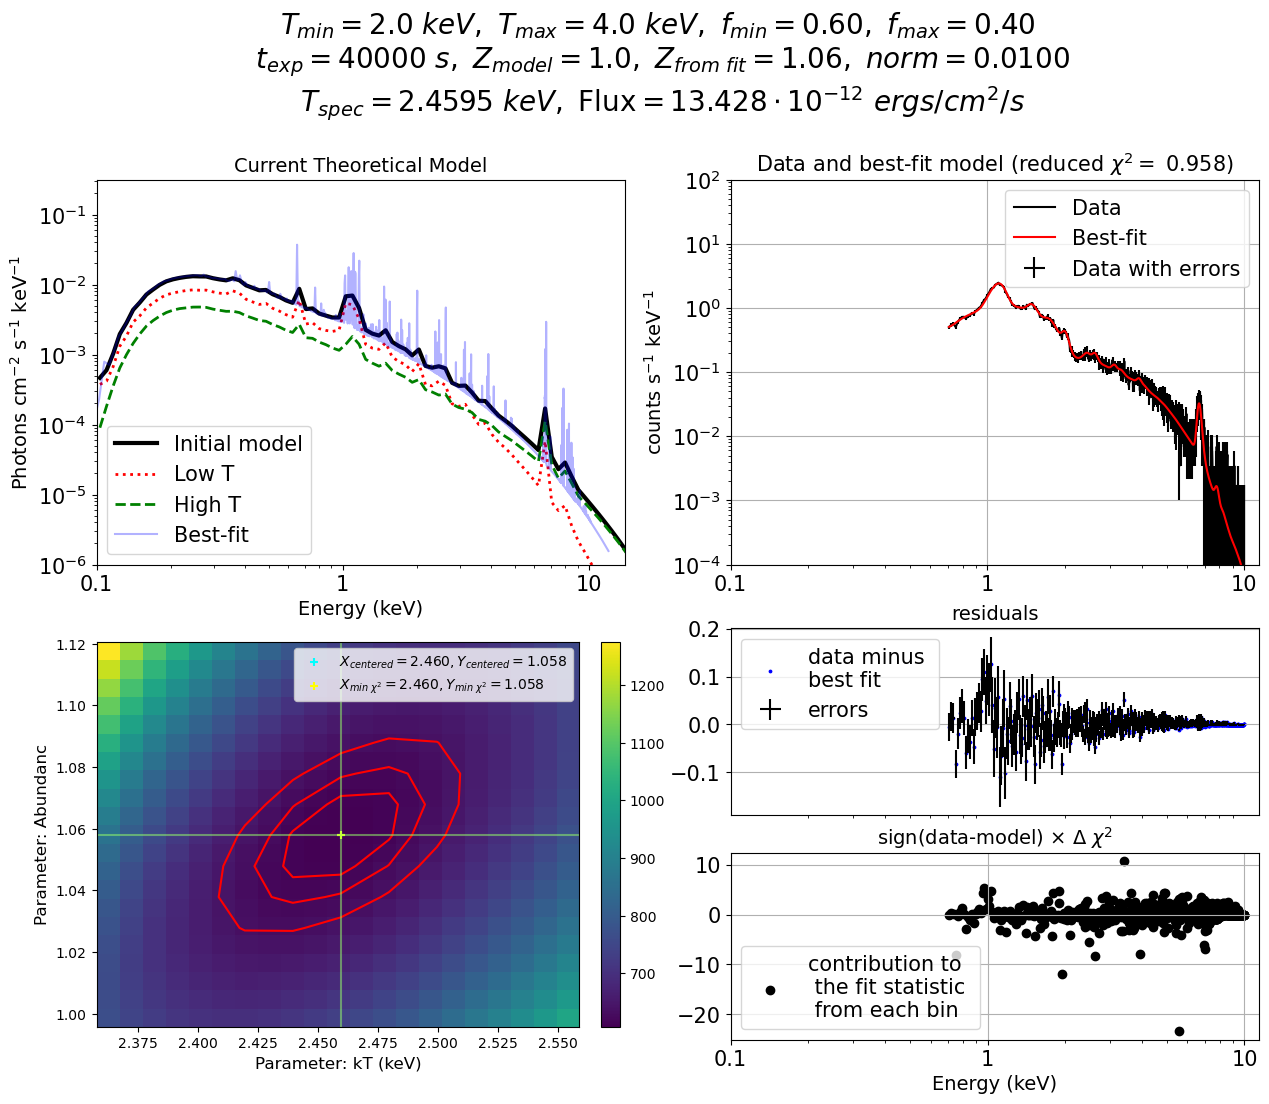

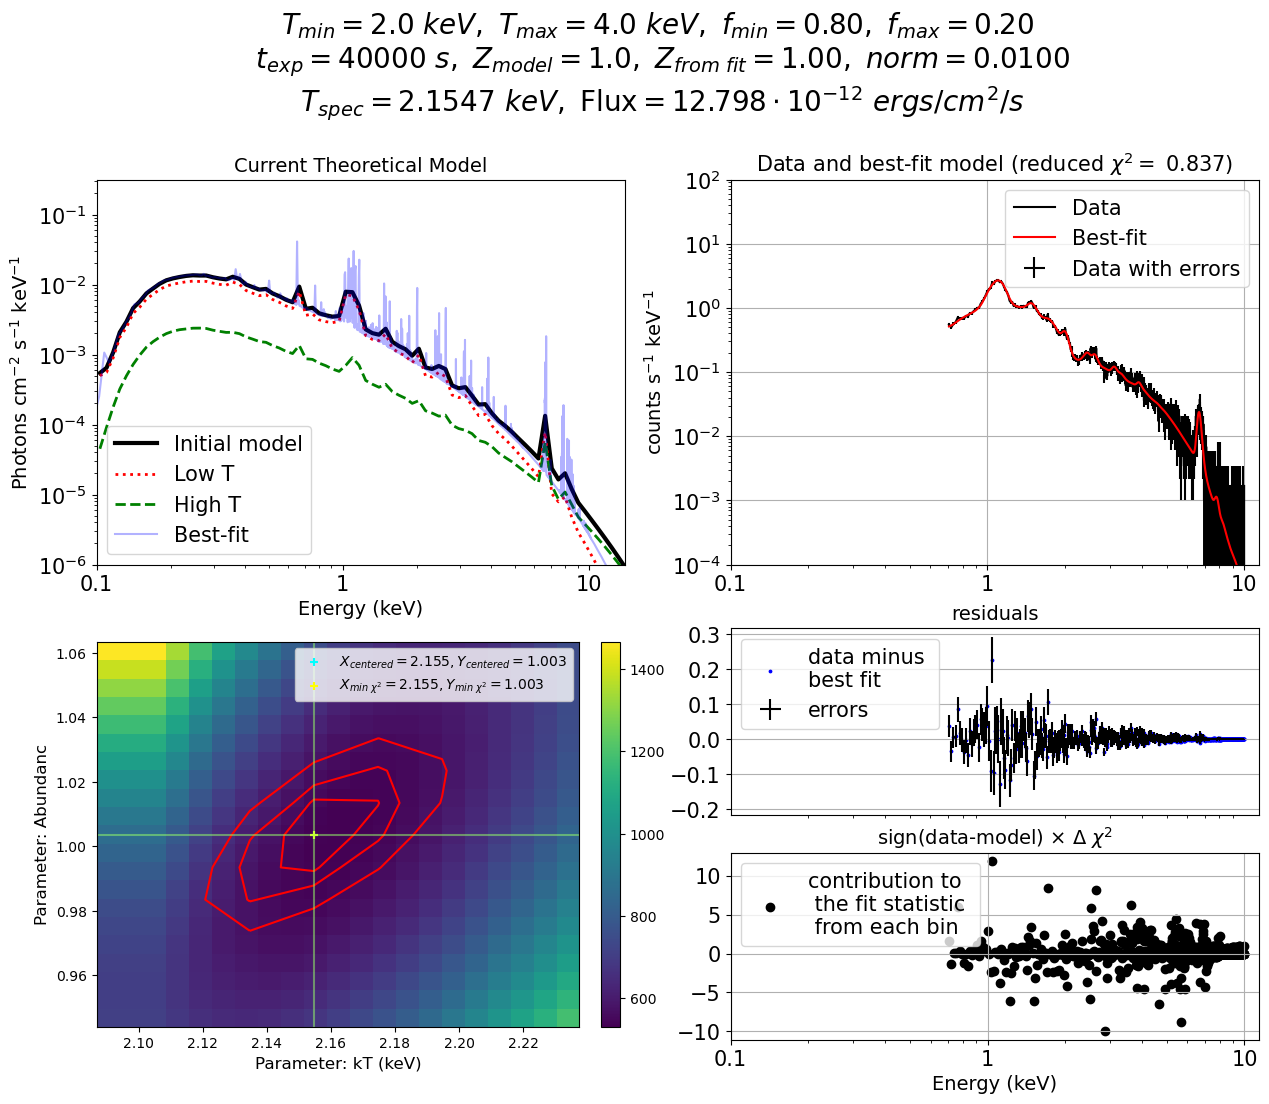

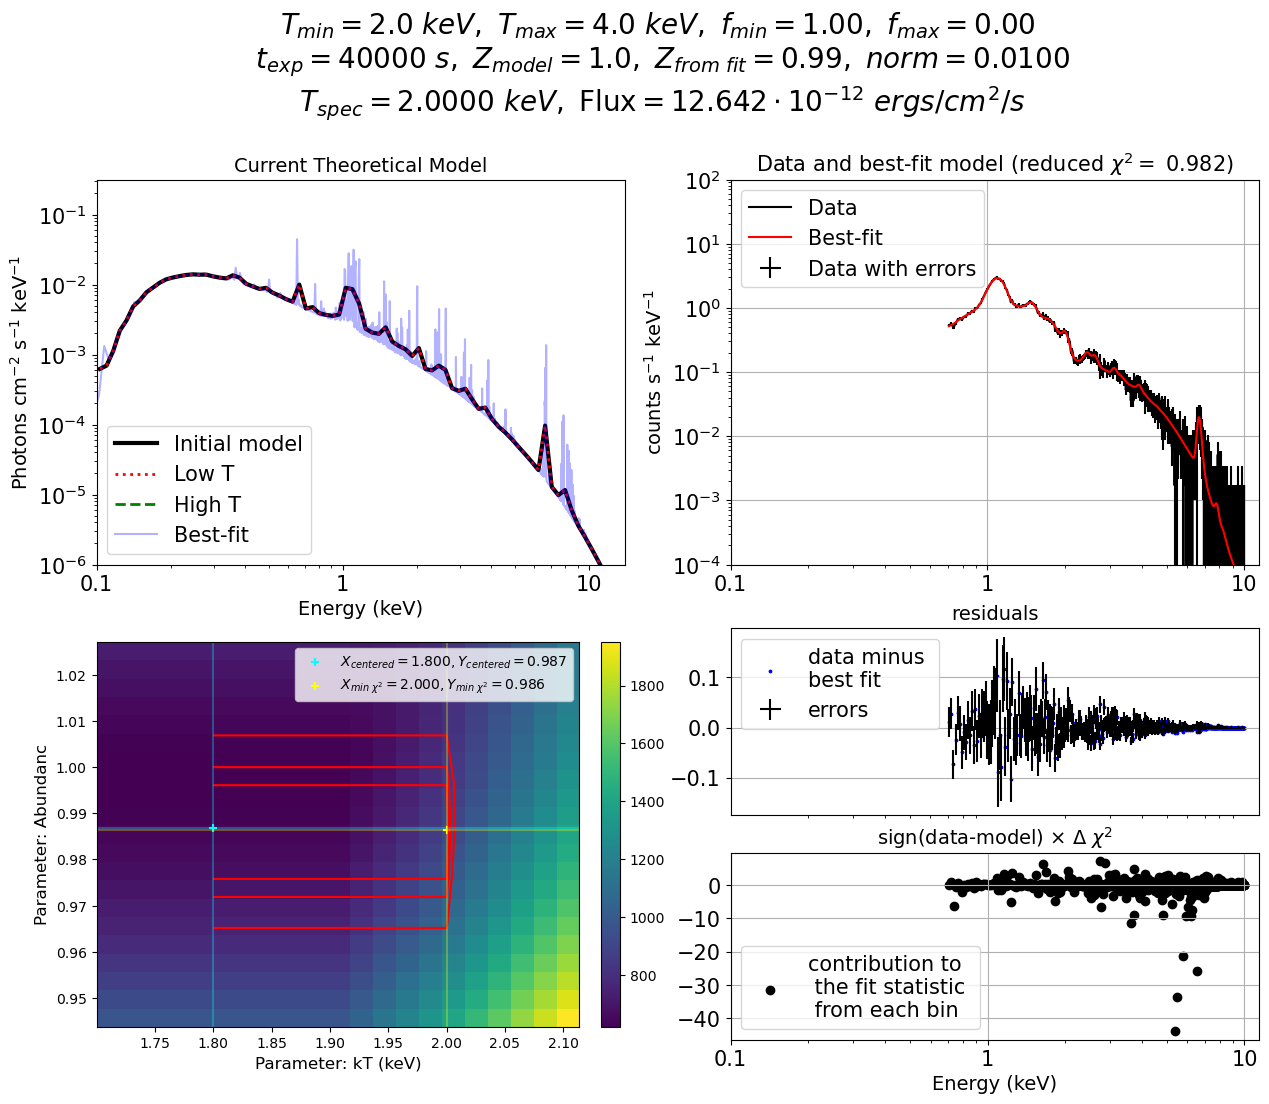

T:  [3.814430399294051, 3.2255201820584842, 2.7845123045246725, 2.4595017988720924, 2.1547024639458257, 2.0]
F:  [1.500597739531381e-11, 1.4465148936297754e-11, 1.3741895545271604e-11, 1.3427599475812969e-11, 1.2797591139855943e-11, 1.2641942610999712e-11]


In [593]:
def single_T_realistic(T_minnn, T_maxxx, N_fmins, abund, telescope_name, nrm, texp, stpar=False, plot=False, Xplot=False):

    x.AllData.clear()
    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=100)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
    
    if Xplot:
        x.Plot.device = "/xs"
    else:
        x.Plot.device = '/null'

    tspec_list = []
    flux_list=[]

    for l in range(0, N_fmins):

        f_minnn = 0.0+1/(N_fmins-1)*(l)
        f_maxxx = 1-f_minnn
        
        # set model for fakeit
        mod = x.Model('phabs*(const*apec+const*apec)')
        mod.setPars(0.01, f_minnn, T_minnn, abund, 0, nrm, f_maxxx, T_maxxx, abund, 0, nrm)
        mod(9).link = "4"
        mod(10).link = "5"
        mod(11).link = "6"
        x.AllModels.show()
       
        # plot model
        if plot:
            plt.figure(figsize=(15, 17))
            plt.subplot(3,2,1)
            draw_model(nrm, linesandcont=False)
        
        # data from fake spectrum
        perform_fakeit(telescope_name, str(texp))
        x.AllData.ignore("**-0.7 10.-**")             # IMPORTANT !
        x.AllData.show()
        
        # fitting
        x.AllModels.clear()
        mod2fit = x.Model("phabs*apec")
        mod2fit.setPars(0.01, 1.0, abund, 0., nrm)
        mod2fit(1).frozen = True    # n_H 
        mod2fit(2).values = f"{(T_minnn+T_maxxx)/2}, 0.001, {T_minnn}, {T_minnn}, {T_maxxx}, {T_maxxx}" # temperature
        mod2fit(3).frozen = False   # abundance
        #mod2fit(4).frozen = False  # redshift   
        mod2fit(5).frozen = True   # norm
        mod2fit(5).values = f"{nrm}, -1, 0.0, 0.0, 1.1, 1.1"
        
        #mod2fit(2).values = f"{(T_minnn+T_maxxx)/2}, 0.0001, {fitlisttttt[l]}, {fitlisttttt[l]}, {ccc[l]}, {ccc[l]}"
        
        #x.AllData.ignore("bad")
        x.Fit.renorm('auto')
        x.Fit.nIterations = 100
        x.Fit.query = 'yes'
        #x.Fit.weight = 'standard'
        x.Fit.statMethod = 'chi'
        x.Fit.perform()
        #x.Fit.goodness(10)
        #x.AllModels.show()
        x.Fit.show()

        # steppar
        if stpar:    
            N_steps = 20
            perform_steppar(mod2fit, 2, 0.2, 3, 0.1, N_steps)
            
        # return some parameters
        best_kT = mod2fit(2).values[0]
        abund_from_fit = mod2fit(3).values[0]
        norm = mod2fit(5).values[0]
        tspec_list.append(best_kT)
        #print(best_kT)

        # calculating flux
        #fluxx = x.AllData(1).rate[0]
        #flux_list.append(fluxx) # in units of counts / s
        x.AllModels.calcFlux('0.7 10.0')
        fluxx = x.AllData(1).flux[0]
        flux_list.append(fluxx) # in units of ergs/cm2/s or use [4] in units of photons / s / cm^2      
        
        if plot:
            plt.suptitle(f'$T_{{min}}={T_minnn} \ keV, \ T_{{max}}={T_maxxx} \ keV, \ f_{{min}}={f_minnn:.2f}, \ f_{{max}}={f_maxxx:.2f}$ \n $t_{{exp}}={texp} \ s, \ Z_{{model}} ={abund}, \ Z_{{from \ fit}} = {abund_from_fit:.2f}, \ norm = {norm:.4f}$ \n $T_{{spec}}={best_kT:.4f} \ keV, \ $Flux$ = {fluxx*10**12:.3f}\cdot 10^{{-12}} \ ergs/cm^2/s$ \n ', fontsize = 20)
            plt.subplot(3,2,3)
            if stpar:
                plot_contours_from_steppar(N_steps, 2, 3, mod2fit, zoomin=True)
            else:
                draw_best_model(nrm, linesandcont=False)
                #draw_goodness()
            plt.subplot(3,2,2)
            draw_data_and_best_model(nrm, linesandcont=False)
            plt.subplot(3,2,1)
            draw_best_model(nrm, linesandcont=False)
            plt.show()
            
        #x.Plot.commands=()
        x.AllData.clear()

    return tspec_list, flux_list
    
aaa, aaa1 = single_T_realistic(2.0, 4.0, 6, 1.0, 'Chandra', nrm=0.01, texp=40000, stpar=True, plot=True, Xplot=False)
print("T: ", aaa)
print("F: ", aaa1)

## 3.2 Figure 5

In [596]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

f_min = np.linspace(0, 1, 11)
T_spec = f_min*0

T_mins = (1.0, 2.0)
T_maxs = (3.0, 6.0)

Tspec_continuum_fit_fig5 = {}
Tspec_cont_all_fig5 = {}
single_T_fit_all_fig5 = {}
Tspec_lines_all_fig5 = {}

exxxpo = 40000
normmm = 0.01

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    #Tsum = np.zeros(11)
    
    Tspec_cont_all_fig5[str(T_min)+'-'+str(T_max)] = get_Tspec_continuum_eq46(f_min, T_min, T_max, 0.73, telescope)
    Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)] = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, normmm, exxxpo, stpar=True, plot=False, Xplot=False)[0]
    
    #N_trials = 10
    #for i in range(0, N_trials):
    #    Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)] = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, normmm, exxxpo, stpar=False, plot=False, Xplot=False)[0]
        #plt.plot(f_min, Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)])
    #    Tsum += Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)]
    #Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)] = Tsum/N_trials
    
    if T_min == 1.0:
        single_T_fit_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_realistic(T_min, T_max, len(f_min), 0.1, telescope, normmm, exxxpo, stpar=True, plot=False, Xplot=False)[0]
        Tspec_lines_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_fit_lines(T_min, T_max, len(f_min), 0.1, telescope, normmm, exxxpo, stpar=True, plot = False, Xplot=False)[0]
    if T_min == 2.0:
        single_T_fit_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_realistic(T_min, T_max, len(f_min), 0.3, telescope, normmm, exxxpo, stpar=True, plot=False, Xplot=False)[0]
        Tspec_lines_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_fit_lines(T_min, T_max, len(f_min), 0.3, telescope, normmm, exxxpo, stpar=True, plot = False, Xplot=False)[0]
    
    print(str(T_min)+'-'+str(T_max)+": done")
    
def print_values(TSPEC_LISTS):
    
    for item in TSPEC_LISTS:
   
        for key in item.keys():
            print(key, 'keV')
            print([f'{vl:.2f}' for vl in item[key]], '\n')
            
#print_values([Tspec_cont_all_fig5, single_T_fit_all_fig5])

1.0-3.0: done
2.0-6.0: done


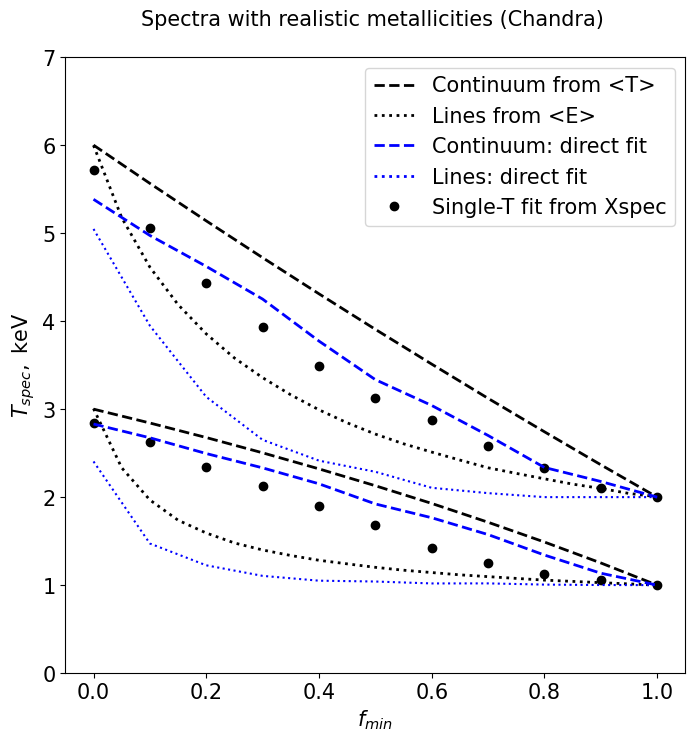

In [597]:
plt.figure(figsize=(8,8))

#telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'
#f_min = np.linspace(0, 1, 6)
#T_mins = (1.0, 2.0)
#T_maxs = (3.0, 6.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # line-dominated from <E>
    plot_Tspec_fmin(T_min, T_max, 20, get_data("data/stats_03.dat", show_table=False), naive=False, lstyle=':', cline='black')
    #Tspec_list3 = f_min*0
    #for i in range(0, len(f_min)):
    #    Tspec_list3[i] = get_Tspec_lines(f_min[i], T_min, T_max, get_data("data/stats_12.dat", show_table=False))
    #plt.plot(f_min, Tspec_list3, linestyle=':', color='black')
    
    # line-dominated from direct fit
    Tspec_list4 = Tspec_lines_all_fig5[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list4, linestyle=':', color='blue')
    
    # continuum from eq. 4,6
    Tspec_list1 = Tspec_cont_all_fig5[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list1, linestyle = '--', linewidth = 2, color = 'black')
    
    # continuum from direct fit
    Tspec_list5 = Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list5, linestyle = '--', linewidth = 2, color = 'blue')
    
    # realistic metallicities
    Tspec_list2 = single_T_fit_all_fig5[str(T_min)+'-'+str(T_max)]
    plt.scatter(f_min, Tspec_list2, color='black')
    #Tspec_list = Tspec_cont_all[str(T_min)+'-'+str(T_max)]
    #plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black')
    #plt.plot(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black', linewidth=1) 
    
handles, labels = plt.gca().get_legend_handles_labels()
line_n = Line2D([], [], label='Continuum from <T>', color='black', linestyle='--', linewidth=2)
line_e = Line2D([], [], label='Lines from <E>', color='black', linestyle=':', linewidth=2)
line_n1 = Line2D([], [], label='Continuum: direct fit', color='blue', linestyle='--', linewidth=2)
line_e1 = Line2D([], [], label='Lines: direct fit', color='blue', linestyle=':', linewidth=2)
dots_f = Line2D([], [], label='Single-T fit from Xspec', color='black', marker='.', linestyle='None', markersize=12)
handles.extend([line_n, line_e, line_n1, line_e1, dots_f])
plt.legend(handles=handles, fontsize=15)
    
plt.ylim(0, 7)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('$f_{min}$', fontsize = 15)
plt.ylabel('$T_{spec},$ keV', fontsize = 15)
plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig5_eROSITA.png')
plt.show()

# Finally, x($f_{line}$)

Figure 6.

In [604]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

f_min = np.linspace(0, 1, 6)

T_mins = (0.5, 1., 2., 3., 0.5, 1., 2., 3., 0.5, 1., 2., 3.)
T_maxs = (1. , 2., 4., 6., 1.5, 3., 6., 9., 2. , 4., 8., 12.)

metallicities = (0.1, 0.3, 1.0)

exxxpo = 40000
normmmm = 0.01

Tspec_lines_f6 = {}
Tspec_cont_f6 = {}
single_T_fit_f6 = {}

Flux_lines_f6 = {}
Flux_cont_f6 = {}
Flux_fit_f6 = {}

print(telescope)

for metallicity in metallicities:

    for T_min, T_max in list(zip(T_mins, T_maxs)):

        name = str(metallicity)+': '+str(T_min)+'-'+str(T_max)

        Tspec_cont_f6[name], Flux_cont_f6[name] = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, normmmm, exxxpo, stpar=True, plot=False, Xplot=False)
        single_T_fit_f6[name], Flux_fit_f6[name] = single_T_realistic(T_min, T_max, len(f_min), metallicity, telescope, normmmm, exxxpo, stpar=True, plot=False, Xplot=False)
        Tspec_lines_f6[name], Flux_lines_f6[name] = single_T_fit_lines(T_min, T_max, len(f_min), metallicity, telescope, normmmm, exxxpo, stpar=True, plot = False, Xplot=False)
        
        print(name + ' done')
        
        #plt.plot(f_min, Tspec_list1, linestyle = '--', linewidth = 2, color = 'black')
        #plt.scatter(f_min, Tspec_list2, color='black')
        #plt.plot(f_min, Tspec_list3, linestyle=':', color='black')
        #plt.show()
        
#print_values([Flux_lines_f6, Flux_cont_f6, Flux_fit_f6])
#print_values([Tspec_lines_f6, Tspec_cont_f6, single_T_fit_f6])

Chandra
0.1: 0.5-1.0 done
0.1: 1.0-2.0 done
0.1: 2.0-4.0 done
0.1: 3.0-6.0 done
0.1: 0.5-1.5 done
0.1: 1.0-3.0 done
0.1: 2.0-6.0 done
0.1: 3.0-9.0 done
0.1: 0.5-2.0 done
0.1: 1.0-4.0 done
0.1: 2.0-8.0 done
0.1: 3.0-12.0 done
0.3: 0.5-1.0 done
0.3: 1.0-2.0 done
0.3: 2.0-4.0 done
0.3: 3.0-6.0 done
0.3: 0.5-1.5 done
0.3: 1.0-3.0 done
0.3: 2.0-6.0 done
0.3: 3.0-9.0 done
0.3: 0.5-2.0 done
0.3: 1.0-4.0 done
0.3: 2.0-8.0 done
0.3: 3.0-12.0 done
1.0: 0.5-1.0 done
1.0: 1.0-2.0 done
1.0: 2.0-4.0 done
1.0: 3.0-6.0 done
1.0: 0.5-1.5 done
1.0: 1.0-3.0 done
1.0: 2.0-6.0 done
1.0: 3.0-9.0 done
1.0: 0.5-2.0 done
1.0: 1.0-4.0 done
1.0: 2.0-8.0 done
1.0: 3.0-12.0 done


In [605]:
#for key in Flux_lines_f6.keys():
#    print(key, 'keV')
    #print([vl*10**10 for vl in Flux_lines_f6[key]], '\n')
    #print([vl*10**10 for vl in Flux_cont_f6[key]], '\n')
    #print([(vl1 + vl2)*10**10 for vl1, vl2 in zip(Flux_lines_f6[key], Flux_cont_f6[key])], '\n')
    #print([vl*10**10 for vl in Flux_fit_f6[key]], '\n')

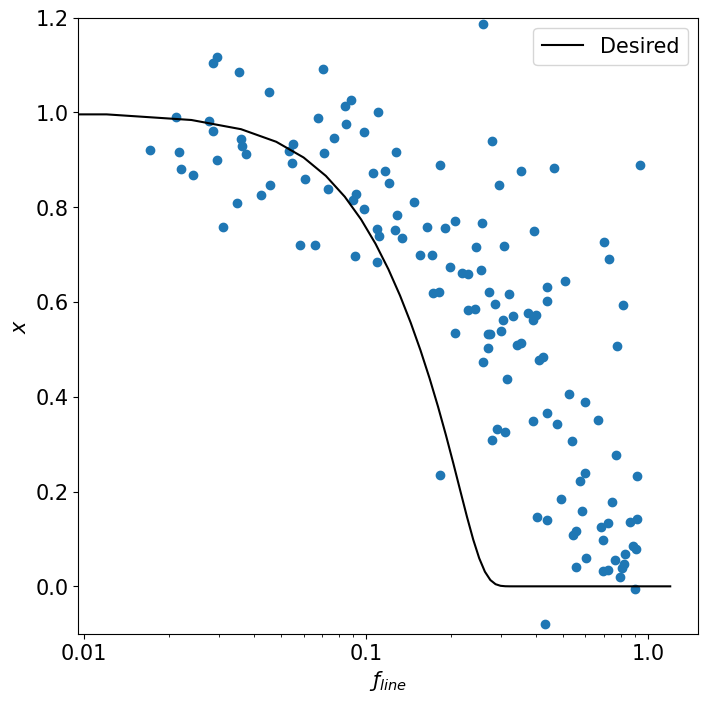

In [730]:
iks_all = []
fline_all = []

for metallicity in metallicities:

    for T_min, T_max in list(zip(T_mins, T_maxs)):

        name_key = str(metallicity)+': '+str(T_min)+'-'+str(T_max)
         
        Tspec_list1 = Tspec_cont_f6[name_key]  # continuum
        Tspec_list2 = single_T_fit_f6[name_key] # realistic metallicities
        Tspec_list3 = Tspec_lines_f6[name_key]  # line-dominated

        num_iks = [tsp - tli for tsp, tli in zip(Tspec_list2, Tspec_list3)]
        denom_iks = [tco - tli for tco, tli in zip(Tspec_list1, Tspec_list3)]

        if 0.0 in denom_iks:
            denom_iks[-1] = 0.0001
        iks = [numx/denomx for numx, denomx in zip(num_iks, denom_iks)]

        Flux_list1 = Flux_cont_f6[name_key]
        Flux_list2 = Flux_fit_f6[name_key]
        Flux_list3 = Flux_lines_f6[name_key]

        #num_fline = Flux_list3
        #denom_fline = [Fli + Fco for Fli, Fco in zip(Flux_list3, Flux_list1)]
        #denom_fline1 = Flux_list2
        #fline = [numf/denomf for numf, denomf in zip(num_fline, denom_fline)]

        fline = [Fli/(Fli + Fco) for Fli, Fco in zip(Flux_list3, Flux_list1)]
        #fline = [Fli/Fsum for Fli, Fsum in zip(Flux_list3, Flux_list2)]
        
        iks_all.append(iks[1:-1])
        fline_all.append(fline[1:-1])

        a=2
        
        if a==1:
            
            plt.figure(figsize=(17,8))
            plt.suptitle(f'$T_{{min}}={T_min} \ keV, \ T_{{max}}={T_max} \ keV.$ Z = '+str(metallicity)+'\n \n', fontsize = 25)

            plt.subplot(1,2,1)
            # continuum
            plt.plot(f_min, Tspec_list1, linestyle = '--', linewidth = 2, color = 'black')
            # realistic metallicities
            plt.scatter(f_min, Tspec_list2)#, color='black')
            # line-dominated
            plt.plot(f_min, Tspec_list3, linestyle=':', color='black')
        
            print('F_cnt + F_lin = F_sum =?= F_fit')
            for i in range(0, len(f_min)):
                print(f'{Flux_list1[i]*10**12:.2f} + {Flux_list3[i]*10**12:.2f} = {Flux_list1[i]*10**12 + Flux_list3[i]*10**12:.2f} =?= {Flux_list2[i]*10**12:.2f} ....... f_line = {fline[i]:.2f}, x = {iks[i]:.2f}')

            handles, labels = plt.gca().get_legend_handles_labels()
            line_n = Line2D([], [], label='Continuum: direct fit', color='black', linestyle='--', linewidth=2)
            line_e = Line2D([], [], label='Lines: direct fit', color='black', linestyle=':', linewidth=2)
            dots_f = Line2D([], [], label='Single-T fit', color='black', marker='.', linestyle='None', markersize=12)
            handles.extend([line_n, line_e, dots_f])
            plt.legend(handles=handles, fontsize=15)

            #plt.ylim(0, 12.1)
            plt.xticks(size=15)
            plt.yticks(size=15)
            plt.xlabel('$f_{min}$', fontsize = 15)
            plt.ylabel('$T_{spec},$ keV', fontsize = 15)
            plt.title('Spectra with realistic metallicities ('+telescope+')', fontsize = 15)
            #plt.savefig('Fig5_eROSITA.png')

            plt.subplot(1,2,2)
            #plt.plot(f_min, iks, color='red')
            #plt.plot(f_min, fline, color='blue')

            plt.scatter(fline[1:-1], iks[1:-1])
            ii = np.linspace(0, 1.2, 101)
            plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')
            plt.xscale('log')
            #plt.ylim(-0.1, 1.2)
            plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
            plt.yticks(size=15)
            plt.xlabel('$ƒ_{line}$', fontsize = 15)
            plt.ylabel('$x$', fontsize = 15)
            #plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
            plt.show()
            
plt.figure(figsize=(8,8))

plt.scatter(fline_all, iks_all)

ii = np.linspace(0, 1.2, 101)
plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')

plt.legend(fontsize=15)
plt.xscale('log')
plt.ylim(-0.1, 1.2)
plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
plt.yticks(size=15)
plt.xlabel('$ƒ_{line}$', fontsize = 15)
plt.ylabel('$x$', fontsize = 15)
#plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig6_'+telescope+'.png')
plt.show()

In [691]:
def universal_function(flin, delta1, delta2, beta):
    
    return np.exp( -(flin/delta1)**(2*beta) ) * np.exp( -(flin/delta2)**(8) )

In [692]:
import emcee

def model(params, x):
    d1, d2, b = params
    return np.exp( -(x/d1)**(2*b) ) * np.exp( -(x/d2)**(8) )

def lnlike(params, x, y):
    d1, d2, b = params
    # the likelihood is sum of the lot of normal distributions
    return -0.5 * np.sum( ((y - model(params, x))/1 )**2 )# + np.log(2*np.pi*sigmu**2) )
    
def lnprior(params):
    # The parameters are stored as a vector of values, so unpack them
    d1, d2, b = params
    # Bounds
    if 0.0 < d1 < 0.5 and 0.0 < d2 < 0.5 and 0.5 < b < 1.5:
        return 0.0
    return -np.inf

def lnprob(params, x, y):
    lp = lnprior(params)
    if np.isfinite(lp):
          return lp + lnlike(params, x, y)
    else:
          return -np.inf

In [731]:
x111 = [item for sublist in fline_all for item in sublist]
y111 = [item for sublist in iks_all for item in sublist]

print(len(x111))
print(len(y111))

for j in range(0, len(y111)):
    
    if y111[j] > 1.2 or y111[j] <= 0:
        x111[j] = "k"
        y111[j] = "k"

x111 = [i for i in x111 if i != "k"]
y111 = [i for i in y111 if i != "k"]

print(len(x111))
print(len(y111))

144
144
138
138


In [732]:
#x111 = np.linspace(0, 1.2, 101)
#y111 = universal_function(x111, 0.19, 0.25, 1.00) + np.random.normal(0, 0.1, size=101)
#plt.scatter(x111, y111)
#plt.xscale('log')

In [734]:
#def best_with_emcee(dtTrue, dmTrue, lengthofchain, arguments, draw):

true_delta1, true_delta2, true_beta = 0.25, 0.25, 1.0

nwalkers = 100
initial = [0.5, 0.5, 0.5]
ndim = len(initial)

# make the initial values more noisy
p0 = [np.array(initial) + 1e-6 * np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args = (x111, y111) )

#p0, _, _ = sampler.run_mcmc(p0, 500, progress=True)
#sampler.reset()
lengthofchain = 500
pos,prob,state = sampler.run_mcmc(p0, lengthofchain, progress = False)

In [735]:
samples = sampler.flatchain
params_best  = samples[np.argmax(sampler.flatlnprobability)]
#randoms = np.random.randint(len(samples), size=50)

#print("Initial dt = {0:.3f}".format(initial[0]))
#print("Initial dm = {0:.3f}".format(initial[1]))
#print("sigmu = {0:.3f}".format(optim.x[2]))

#print('Best dt = {0:.3f}'.format(s[0]))
#print('Best dmu = {0:.3f}'.format(s[1])) 
#print('or best magnification ratio = {0:.3f}'.format(10**(-0.4*s[1])) )


#for params in samples[randoms]:
#  plt.plot(arguments[0], model(params, arguments[0], arguments[2], arguments[3]), color="b", alpha=0.1)

#best_fit_model = model(params_best, arguments[0], arguments[2], arguments[3])

#return params_best[0], params_best[1], samples[randoms]

#best_dt, best_dm, srand = best_with_MCMC(dtTrue=dt_true, 
#                              dmTrue=dm_true, 
#                              lengthofchain=500, 
#                              arguments=(t1_grid, lc1_noise, t2_grid, lc2_noise), 
#                              draw=True)
#print(best_dt, best_dm)
params_best

array([0.49724689, 0.49913498, 0.55664241])

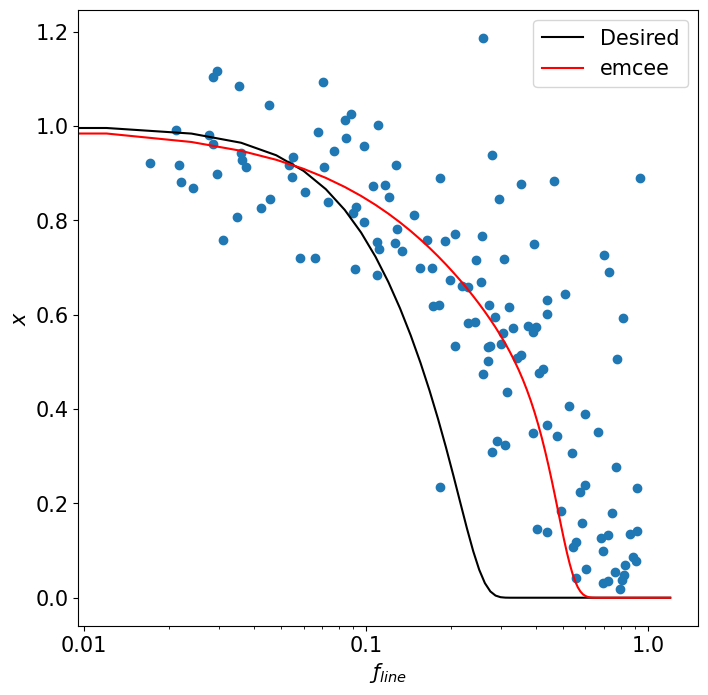

In [736]:
plt.figure(figsize=(8,8))
plt.scatter(x111, y111)

ii = np.linspace(0, 1.2, 101)
plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')
plt.plot(ii, model(params_best, ii), color='red', linestyle='-', label = 'emcee')

plt.legend(fontsize=15)
plt.xscale('log')
#plt.ylim(-0.1, 1.2)
plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
plt.yticks(size=15)
plt.xlabel('$ƒ_{line}$', fontsize = 15)
plt.ylabel('$x$', fontsize = 15)
#plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig6_'+telescope+'.png')
plt.show()

In [ ]:

    #if False:
    #  fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
    #  chain = sampler.get_chain()
    #  labels = ['$\Delta t$', '$\Delta m$', '$\sigma_m$']
    #  for i in range(ndim):
    #      ax = axes[i]
    #      ax.plot(chain[:, :, i], "k", alpha=0.3)
    #      ax.set_xlim(0, len(chain))
    #      ax.set_ylabel(labels[i])
    #      ax.yaxis.set_label_coords(-0.1, 0.5)
    #  axes[-1].set_xlabel("step number")
      #tau = sampler.get_autocorr_time()
      #print(tau)
      #flat_samples = sampler.get_chain()#discard=400, thin=1, flat=False)
      #print(flat_samples.shape)

    #  fig = corner.corner(sampler.flatchain, 
    #                      show_titles=True, 
    #                      labels=['$\Delta t$', '$\Delta m$'], 
    #                      truths=[dt_true, dm_true], 
    #                      scale_hist=True, 
    #                      quantiles=[0.16, 0.5, 0.84])


Some results:

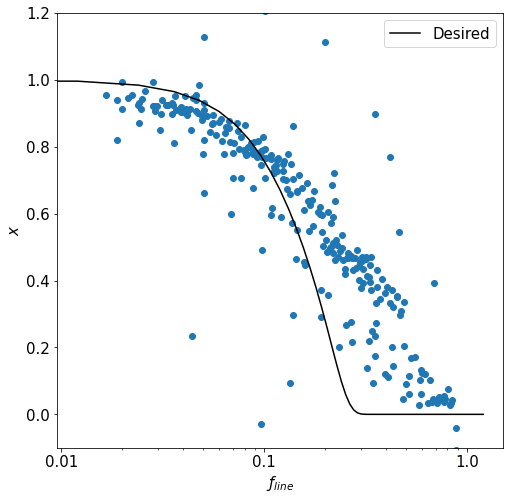

In [154]:
plt.figure(figsize=(8,8))

#telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

iks_all = []
fline_all = []

T_mins = (1., 2., 3., 1., 2., 3., 1., 2., 3.)
T_maxs = (2., 4., 6., 3., 6., 9., 4., 8., 12.)

for metallicity in (0.1, 0.3, 1.0):

    for T_min, T_max in list(zip(T_mins, T_maxs)):
        
        name_key = str(metallicity)+': '+str(T_min)+'-'+str(T_max)

        # continuum
        Tspec_list1 = Tspec_cont_f6[name_key]
        Flux_list1 = Flux_cont_f6[name_key]

        # realistic metallicities
        Tspec_list2 = single_T_fit_f6[name_key]
        Flux_list2 = Flux_fit_f6[name_key]

        #line-dominated
        Tspec_list3 = Tspec_lines_f6[name_key]
        Flux_list3 = Flux_lines_f6[name_key]

        num_iks = [tsp - tli for tsp, tli in zip(Tspec_list2, Tspec_list3)]
        denom_iks = [tco - tli for tco, tli in zip(Tspec_list1, Tspec_list3)]
        iks = [numx/denomx for numx, denomx in zip(num_iks, denom_iks)]

        num_fline = Flux_list3
        denom_fline = Flux_list2 #[Fli + Fco for Fli, Fco in zip(Flux_list3, Flux_list1)]
        fline = [numf/denomf for numf, denomf in zip(num_fline, denom_fline)]

        iks_all.append(iks)
        fline_all.append(fline)

        #plt.scatter(fline, iks)

plt.scatter(fline_all, iks_all)


#plt.scatter(fline_all_1, iks_all_1, label = 'Z = 0.1')
#plt.scatter(fline_all_2, iks_all_2, label = 'Z = 0.3')
#plt.scatter(fline_all_3, iks_all_3, label = 'Z = 1.0')

#for ii in np.linspace(0, 1.2, 101):
ii = np.linspace(0, 1.2, 101)
plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')

#handles, labels = plt.gca().get_legend_handles_labels()
#line_n = Line2D([], [], label='Continuum', color='black', linestyle='--', linewidth=2)
#line_e = Line2D([], [], label='Lines', color='black', linestyle=':', linewidth=2)
#dots_f = Line2D([], [], label='Single-T fit from Xspec', color='black', marker='.', linestyle='None', markersize=12)
#handles.extend([line_n, line_e, dots_f])
#plt.legend(handles=handles, fontsize=15)

plt.legend(fontsize=15)
plt.xscale('log')
plt.ylim(-0.1, 1.2)
plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
plt.yticks(size=15)
plt.xlabel('$ƒ_{line}$', fontsize = 15)
plt.ylabel('$x$', fontsize = 15)
#plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
#plt.savefig('Fig6_'+telescope+'.png')
plt.show()